In [8]:
from kan import *
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

from torch import optim
from numpy.polynomial import legendre as leg
from scipy.integrate import quad
from scipy.linalg import eigh
from scipy.interpolate import UnivariateSpline

In [9]:
style = "ggplot"

In [10]:
def FEM1D(coords):
    N = len(coords)
    stiff_loc = np.array([[2.0, -2.0],
                          [-2.0, 2.0]])
    mass_loc = np.array([[2/3, 1/3],
                         [1/3, 2/3]])
    eles = [np.array([cont, cont + 1]) for cont in range(0, N - 1)]
    stiff = np.zeros((N, N))
    mass = np.zeros((N, N))
    for ele in eles:  ## Ensamblaje
        jaco = coords[ele[1]] - coords[ele[0]]
        for cont1, row in enumerate(ele):
            for cont2, col in enumerate(ele):
                stiff[row, col] = stiff[row, col] +  stiff_loc[cont1, cont2]/jaco
                mass[row, col] = mass[row, col] +  jaco*mass_loc[cont1, cont2]
    return stiff, mass

# Caso de ejemplo
N = 1000
nvals = 10
x = np.linspace(0, 1, N)

# FEM1D
stiff, mass = FEM1D(x)

# Vectores propios
vals, vecs = eigh(stiff[1:-1, 1:-1],
                  mass[1:-1, 1:-1],
                  subset_by_index=(0, nvals - 1))

vecs_comp = np.zeros((N, nvals))
vecs_comp[1:-1, :] = vecs

# Interpolación
x_eval = torch.linspace(0, 1, N).detach().numpy()
spline = UnivariateSpline(x, vecs_comp[:, 2], s=0, k=2)
v_eval = spline(x_eval)
v_eval = v_eval.reshape(N, 1)
#
#spline_derivative = spline.derivative()
#v_eval_derivative = spline_derivative(x)


In [11]:
v_test = torch.zeros(N, nvals)
v_dv = torch.zeros(N, nvals)
for i in range(vecs_comp.shape[1]):
    spline_mode = UnivariateSpline(x, vecs_comp[:, i], s=0, k=2)
    v_mode = spline_mode(x)  
    v_mode = v_mode.reshape(N, 1)  
    print(v_mode.shape)

    v_test[:, i] = torch.tensor(v_mode).squeeze()
    v_dv[:, i] = torch.tensor(spline_mode.derivative()(x)).squeeze()

v_test.shape, v_dv.shape

(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)


(torch.Size([1000, 10]), torch.Size([1000, 10]))

In [12]:
def f_rhs(x):
  return(0.*x + 1)
  #return(torch.tensor(1.0))
  #return 0.*x-2. #4*torch.sin(2 * x) # #
  

def exact_u(x):
  #return x*(x-torch.pi) # #torch.sin(2 * x) #
  return -(torch.sin(torch.tensor(0.5))/torch.cos(torch.tensor(0.5))) * torch.sin(x) - torch.cos(x) + 1

checkpoint directory created: ./model
saving model version 0.0
Loss at iteration 5: 0.473831653594971


c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:419: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:429: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:430: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  output_range_spline = torch.std(postacts_nu

Loss at iteration 10: 0.470549762248993


c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:419: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:429: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:430: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  output_range_spline = torch.std(postacts_nu

Loss at iteration 15: 0.470566093921661


c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:419: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:429: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:430: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  output_range_spline = torch.std(postacts_nu

Loss at iteration 20: 0.467642515897751


c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:419: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:429: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:430: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  output_range_spline = torch.std(postacts_nu

Loss at iteration 25: 0.466021567583084


c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:419: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:429: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:430: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  output_range_spline = torch.std(postacts_nu

Loss at iteration 30: 0.464451551437378


c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:419: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:429: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:430: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  output_range_spline = torch.std(postacts_nu

Loss at iteration 35: 0.461414754390717


c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:419: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:429: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:430: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  output_range_spline = torch.std(postacts_nu

Loss at iteration 40: 0.457527458667755


c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:419: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:429: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:430: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  output_range_spline = torch.std(postacts_nu

Loss at iteration 45: 0.451935350894928


c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:419: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:429: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:430: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  output_range_spline = torch.std(postacts_nu

Loss at iteration 50: 0.443831741809845


c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:419: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:429: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:430: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  output_range_spline = torch.std(postacts_nu

Loss at iteration 55: 0.432775616645813


c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:419: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:429: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:430: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  output_range_spline = torch.std(postacts_nu

Loss at iteration 60: 0.417826473712921


C:\Users\greg2\AppData\Local\Temp\ipykernel_9108\3060396429.py:113: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:419: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:429: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\

Loss at iteration 65: 0.398382902145386


c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:419: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:429: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:430: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  output_range_spline = torch.std(postacts_nu

Loss at iteration 70: 0.374482303857803


c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:419: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:429: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:430: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  output_range_spline = torch.std(postacts_nu

Loss at iteration 75: 0.346503615379333


c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:419: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:429: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:430: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  output_range_spline = torch.std(postacts_nu

Loss at iteration 80: 0.315497398376465


c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:419: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:429: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:430: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  output_range_spline = torch.std(postacts_nu

Loss at iteration 85: 0.283783197402954


c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:419: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:429: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:430: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  output_range_spline = torch.std(postacts_nu

Loss at iteration 90: 0.254946112632751


c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:419: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:429: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:430: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  output_range_spline = torch.std(postacts_nu

Loss at iteration 95: 0.230860754847527


c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:419: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:429: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:430: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  output_range_spline = torch.std(postacts_nu

Loss at iteration 100: 0.209168672561646


c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:419: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:429: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:430: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  output_range_spline = torch.std(postacts_nu

Loss at iteration 105: 0.185025036334991


c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:419: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:429: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:430: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  output_range_spline = torch.std(postacts_nu

Loss at iteration 110: 0.155820727348328


c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:419: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:429: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:430: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  output_range_spline = torch.std(postacts_nu

Loss at iteration 115: 0.123182125389576


c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:419: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:429: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:430: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  output_range_spline = torch.std(postacts_nu

Loss at iteration 120: 0.090216964483261


c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:419: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:429: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:430: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  output_range_spline = torch.std(postacts_nu

Loss at iteration 125: 0.060647379606962


c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:419: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:429: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:430: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  output_range_spline = torch.std(postacts_nu

Loss at iteration 130: 0.038863401859999


c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:419: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:429: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:430: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  output_range_spline = torch.std(postacts_nu

Loss at iteration 135: 0.026984669268131


c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:419: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:429: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:430: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  output_range_spline = torch.std(postacts_nu

Loss at iteration 140: 0.021654250100255


c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:419: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:429: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:430: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  output_range_spline = torch.std(postacts_nu

Loss at iteration 145: 0.017901051789522


c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:419: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:429: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:430: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  output_range_spline = torch.std(postacts_nu

Loss at iteration 150: 0.014717424288392


c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:419: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:429: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:430: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  output_range_spline = torch.std(postacts_nu

Loss at iteration 155: 0.012827541679144


c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:419: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:429: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:430: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  output_range_spline = torch.std(postacts_nu

Loss at iteration 160: 0.011650632135570


c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:419: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:429: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:430: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  output_range_spline = torch.std(postacts_nu

Loss at iteration 165: 0.010348426178098


c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:419: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:429: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:430: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  output_range_spline = torch.std(postacts_nu

Loss at iteration 170: 0.008958798833191


c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:419: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:429: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:430: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  output_range_spline = torch.std(postacts_nu

Loss at iteration 175: 0.007841173559427


c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:419: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:429: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:430: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  output_range_spline = torch.std(postacts_nu

Loss at iteration 180: 0.006994482595474


c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:419: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:429: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:430: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  output_range_spline = torch.std(postacts_nu

Loss at iteration 185: 0.006231825798750


c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:419: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:429: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:430: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  output_range_spline = torch.std(postacts_nu

Loss at iteration 190: 0.005503235384822


c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:419: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:429: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:430: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  output_range_spline = torch.std(postacts_nu

Loss at iteration 195: 0.004822709597647


c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:419: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:429: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:430: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  output_range_spline = torch.std(postacts_nu

Loss at iteration 200: 0.004180538933724


c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:419: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:429: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:430: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  output_range_spline = torch.std(postacts_nu

Loss at iteration 205: 0.003596702590585


c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:419: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:429: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:430: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  output_range_spline = torch.std(postacts_nu

Loss at iteration 210: 0.003121028188616


c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:419: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:429: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:430: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  output_range_spline = torch.std(postacts_nu

Loss at iteration 215: 0.002767267171293


c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:419: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:429: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:430: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  output_range_spline = torch.std(postacts_nu

Loss at iteration 220: 0.002506945282221


c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:419: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:429: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:430: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  output_range_spline = torch.std(postacts_nu

Loss at iteration 225: 0.002308145398274


c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:419: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:429: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:430: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  output_range_spline = torch.std(postacts_nu

Loss at iteration 230: 0.002147199586034


c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:419: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:429: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:430: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  output_range_spline = torch.std(postacts_nu

Loss at iteration 235: 0.002008060459048


c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:419: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:429: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:430: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  output_range_spline = torch.std(postacts_nu

Loss at iteration 240: 0.001883422606625


c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:419: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:429: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:430: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  output_range_spline = torch.std(postacts_nu

Loss at iteration 245: 0.001770782866515


c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:419: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:429: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:430: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  output_range_spline = torch.std(postacts_nu

Loss at iteration 250: 0.001667849835940


c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:419: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:429: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:430: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  output_range_spline = torch.std(postacts_nu

Loss at iteration 255: 0.001572454231791


c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:419: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:429: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:430: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  output_range_spline = torch.std(postacts_nu

Loss at iteration 260: 0.001483279396780


c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:419: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:429: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:430: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  output_range_spline = torch.std(postacts_nu

Loss at iteration 265: 0.001399417757057


c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:419: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:429: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:430: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  output_range_spline = torch.std(postacts_nu

Loss at iteration 270: 0.001320232287981


c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:419: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:429: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:430: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  output_range_spline = torch.std(postacts_nu

Loss at iteration 275: 0.001245307386853


c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:419: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:429: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:430: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  output_range_spline = torch.std(postacts_nu

Loss at iteration 280: 0.001174279255792


c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:419: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:429: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:430: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  output_range_spline = torch.std(postacts_nu

Loss at iteration 285: 0.001106909941882


c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:419: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:429: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:430: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  output_range_spline = torch.std(postacts_nu

Loss at iteration 290: 0.001043059630319


c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:419: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:429: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:430: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  output_range_spline = torch.std(postacts_nu

Loss at iteration 295: 0.000982654746622


c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:419: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:429: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:430: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  output_range_spline = torch.std(postacts_nu

Loss at iteration 300: 0.000925632251892


c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:419: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:429: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:430: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  output_range_spline = torch.std(postacts_nu

Loss at iteration 305: 0.000871948781423


c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:419: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:429: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:430: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  output_range_spline = torch.std(postacts_nu

Loss at iteration 310: 0.000821549212560


c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:419: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:429: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:430: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  output_range_spline = torch.std(postacts_nu

Loss at iteration 315: 0.000774388841819


c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:419: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:429: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:430: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  output_range_spline = torch.std(postacts_nu

Loss at iteration 320: 0.000730426632799


c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:419: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:429: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:430: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  output_range_spline = torch.std(postacts_nu

Loss at iteration 325: 0.000689594831783


c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:419: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:429: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:430: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  output_range_spline = torch.std(postacts_nu

Loss at iteration 330: 0.000651836395264


c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:419: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:429: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:430: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  output_range_spline = torch.std(postacts_nu

Loss at iteration 335: 0.000617063313257


c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:419: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:429: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:430: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  output_range_spline = torch.std(postacts_nu

Loss at iteration 340: 0.000585192523431


c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:419: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:429: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:430: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  output_range_spline = torch.std(postacts_nu

Loss at iteration 345: 0.000556105922442


c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:419: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:429: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:430: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  output_range_spline = torch.std(postacts_nu

Loss at iteration 350: 0.000529675860889


c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:419: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:429: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:430: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  output_range_spline = torch.std(postacts_nu

Loss at iteration 355: 0.000505756877828


c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:419: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:429: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:430: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  output_range_spline = torch.std(postacts_nu

Loss at iteration 360: 0.000484196440084


c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:419: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:429: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:430: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  output_range_spline = torch.std(postacts_nu

Loss at iteration 365: 0.000464827113319


c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:419: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:429: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:430: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  output_range_spline = torch.std(postacts_nu

Loss at iteration 370: 0.000447480386356


c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:419: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:429: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:430: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  output_range_spline = torch.std(postacts_nu

Loss at iteration 375: 0.000431978551205


c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:419: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:429: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:430: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  output_range_spline = torch.std(postacts_nu

Loss at iteration 380: 0.000418159004766


c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:419: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:429: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:430: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  output_range_spline = torch.std(postacts_nu

Loss at iteration 385: 0.000405836763093


c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:419: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:429: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:430: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  output_range_spline = torch.std(postacts_nu

Loss at iteration 390: 0.000394858565414


c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:419: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:429: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:430: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  output_range_spline = torch.std(postacts_nu

Loss at iteration 395: 0.000385061837733


c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:419: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:429: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:430: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  output_range_spline = torch.std(postacts_nu

Loss at iteration 400: 0.000376304582460


c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:419: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:429: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:430: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  output_range_spline = torch.std(postacts_nu

Loss at iteration 405: 0.000368445878848


c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:419: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:429: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:430: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  output_range_spline = torch.std(postacts_nu

Loss at iteration 410: 0.000361362064723


c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:419: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:429: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:430: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  output_range_spline = torch.std(postacts_nu

Loss at iteration 415: 0.000354950287146


c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:419: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:429: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:430: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  output_range_spline = torch.std(postacts_nu

Loss at iteration 420: 0.000349103269400


c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:419: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:429: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:430: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  output_range_spline = torch.std(postacts_nu

Loss at iteration 425: 0.000343741383404


c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:419: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:429: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:430: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  output_range_spline = torch.std(postacts_nu

Loss at iteration 430: 0.000338782469044


c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:419: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:429: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:430: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  output_range_spline = torch.std(postacts_nu

Loss at iteration 435: 0.000334171985742


c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:419: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:429: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:430: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  output_range_spline = torch.std(postacts_nu

Loss at iteration 440: 0.000329850037815


c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:419: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:429: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:430: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  output_range_spline = torch.std(postacts_nu

Loss at iteration 445: 0.000325769826304


c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:419: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:429: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:430: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  output_range_spline = torch.std(postacts_nu

Loss at iteration 450: 0.000321891246131


c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:419: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:429: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:430: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  output_range_spline = torch.std(postacts_nu

Loss at iteration 455: 0.000318188482197


c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:419: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:429: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:430: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  output_range_spline = torch.std(postacts_nu

Loss at iteration 460: 0.000314628297929


c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:419: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:429: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:430: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  output_range_spline = torch.std(postacts_nu

Loss at iteration 465: 0.000311194045935


c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:419: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:429: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:430: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  output_range_spline = torch.std(postacts_nu

Loss at iteration 470: 0.000307868060190


c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:419: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:429: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:430: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  output_range_spline = torch.std(postacts_nu

Loss at iteration 475: 0.000304635497741


c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:419: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:429: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:430: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  output_range_spline = torch.std(postacts_nu

Loss at iteration 480: 0.000301485997625


c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:419: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:429: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:430: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  output_range_spline = torch.std(postacts_nu

Loss at iteration 485: 0.000298408995150


c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:419: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:429: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:430: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  output_range_spline = torch.std(postacts_nu

Loss at iteration 490: 0.000295393110719


c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:419: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:429: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:430: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  output_range_spline = torch.std(postacts_nu

Loss at iteration 495: 0.000292440352496


c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:419: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:429: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  input_range = torch.std(preacts, dim=0) + 0.1
c:\Users\greg2\Desktop\pyk_gpu\pykan-master\kan\MultKAN.py:430: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  output_range_spline = torch.std(postacts_nu

Loss at iteration 500: 0.000289546995191


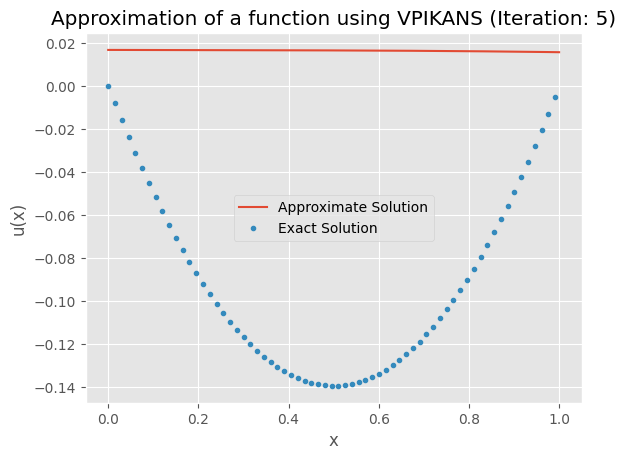

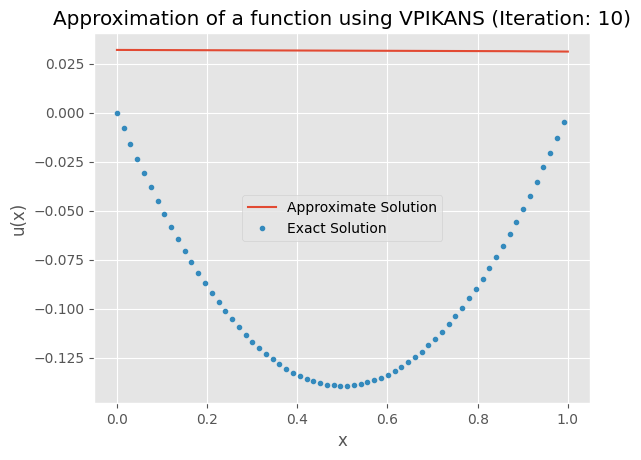

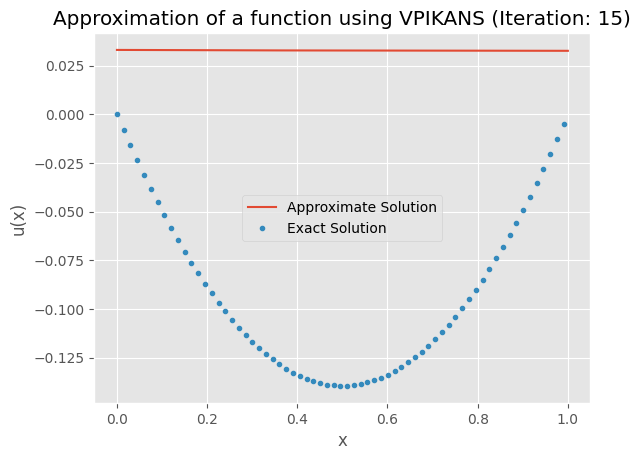

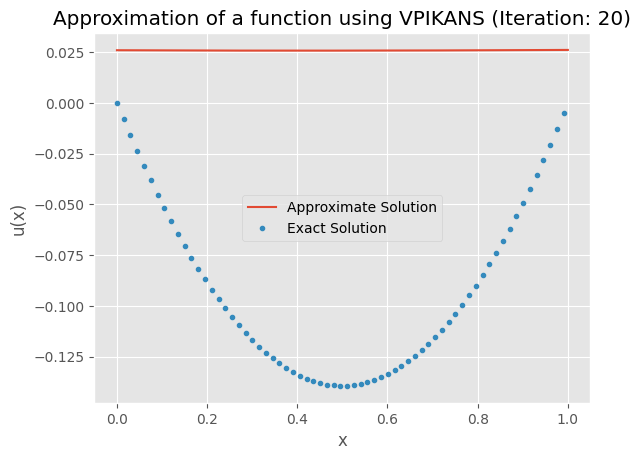

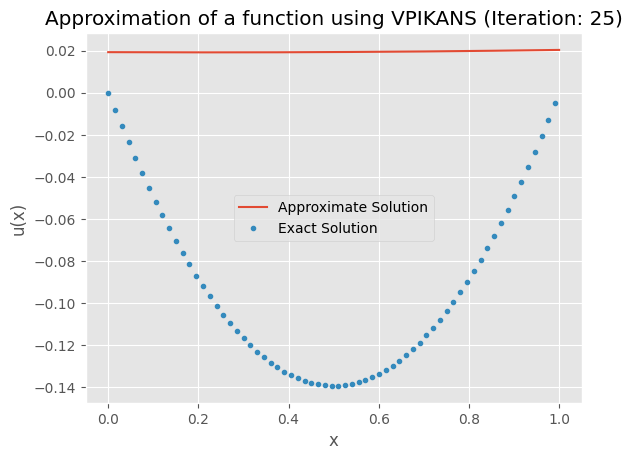

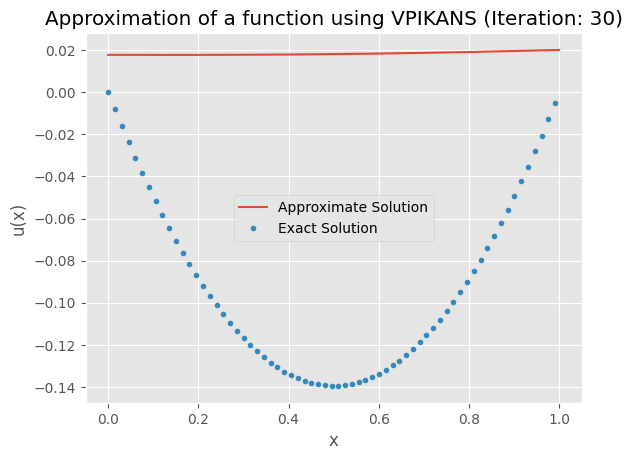

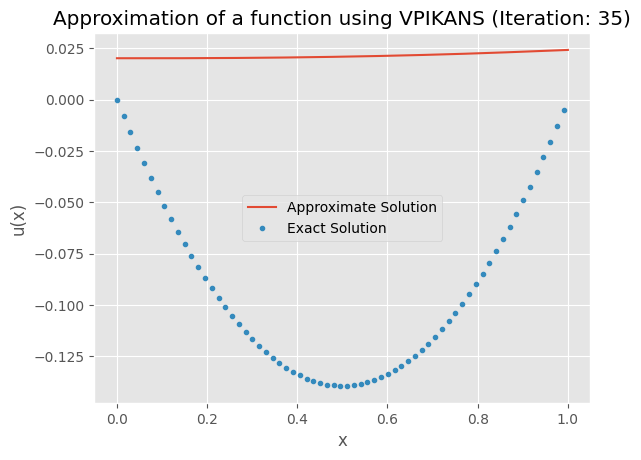

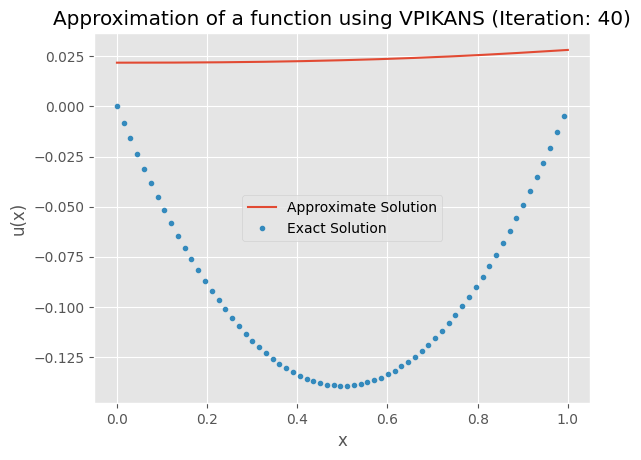

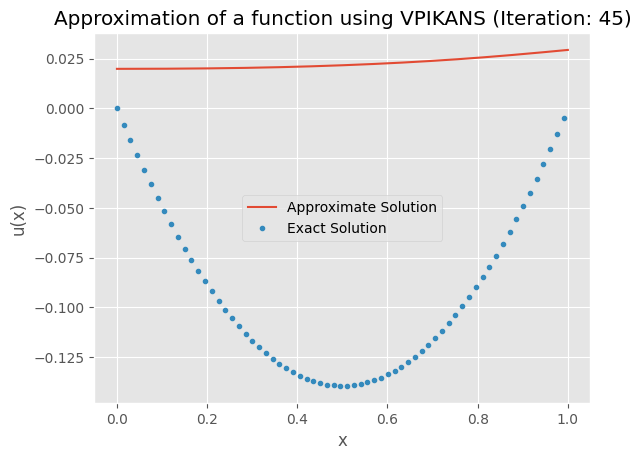

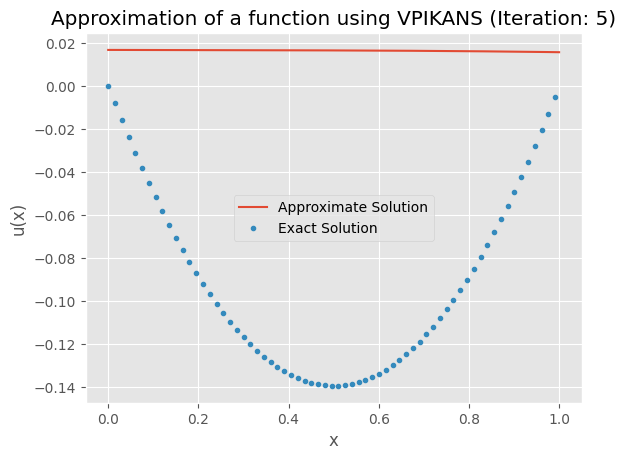

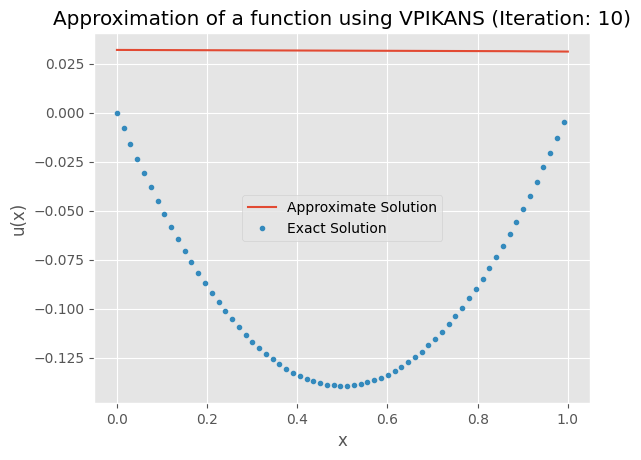

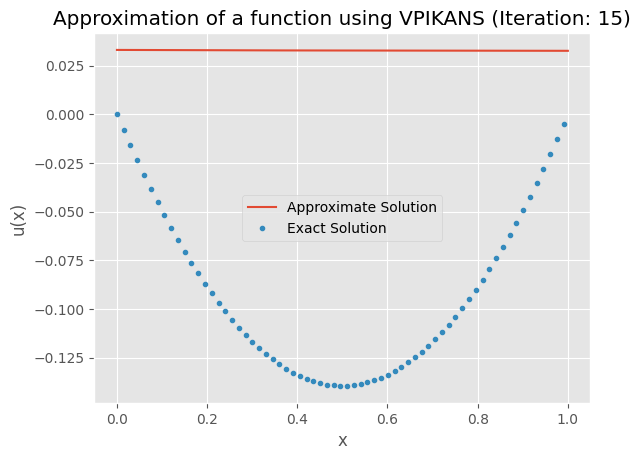

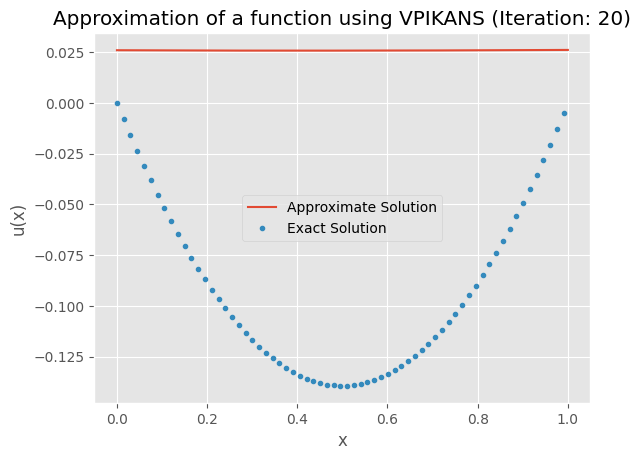

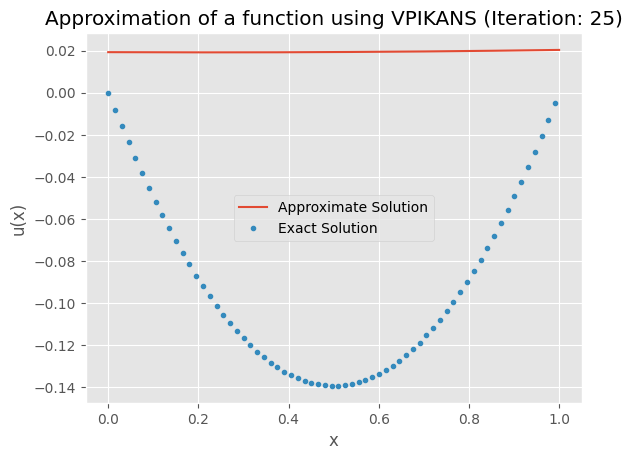

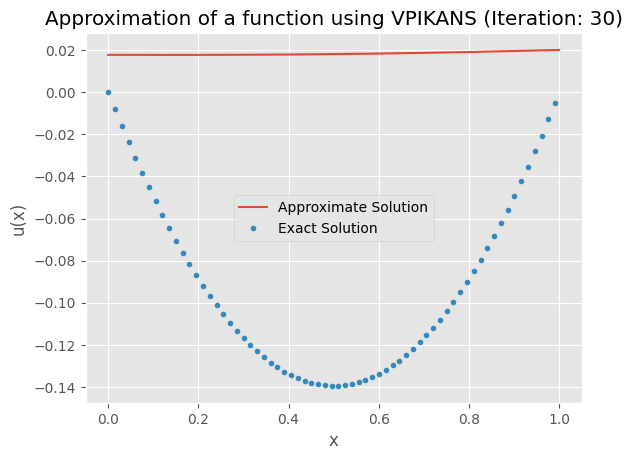

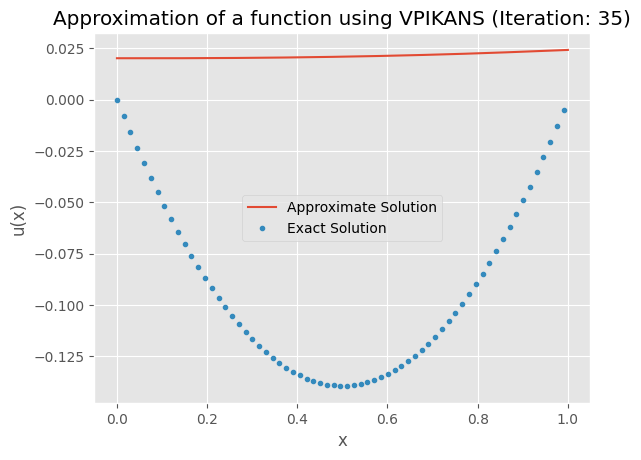

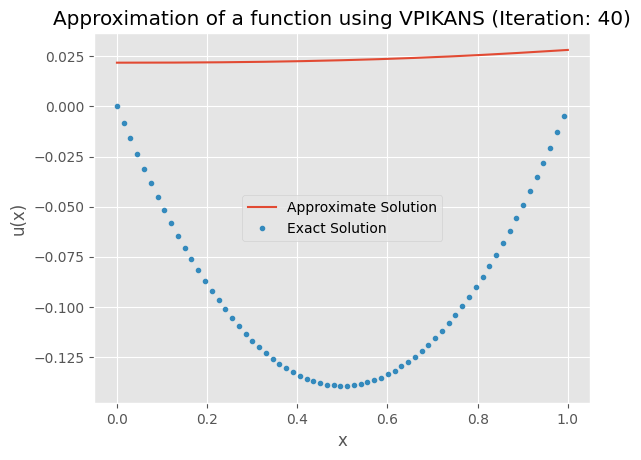

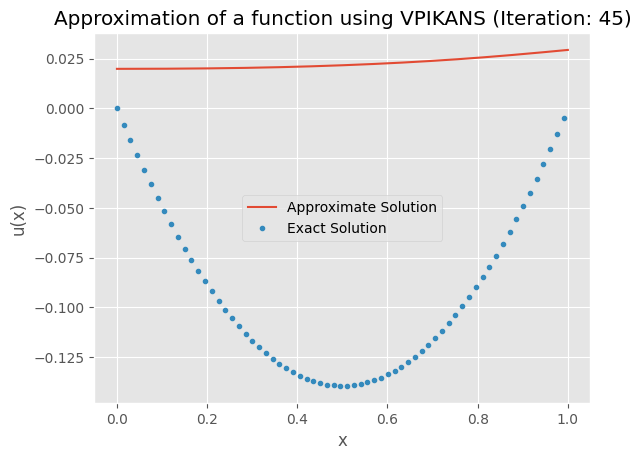

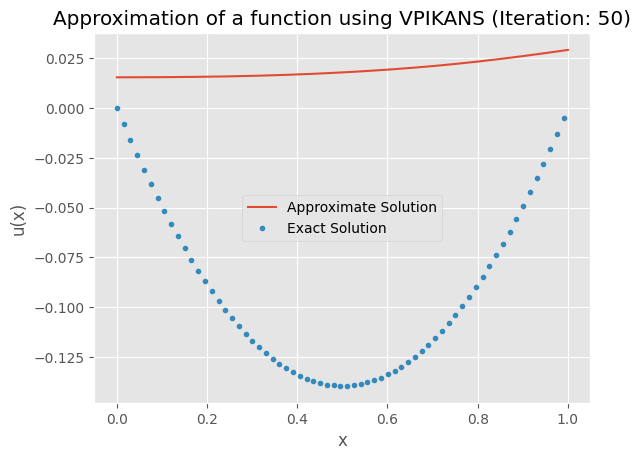

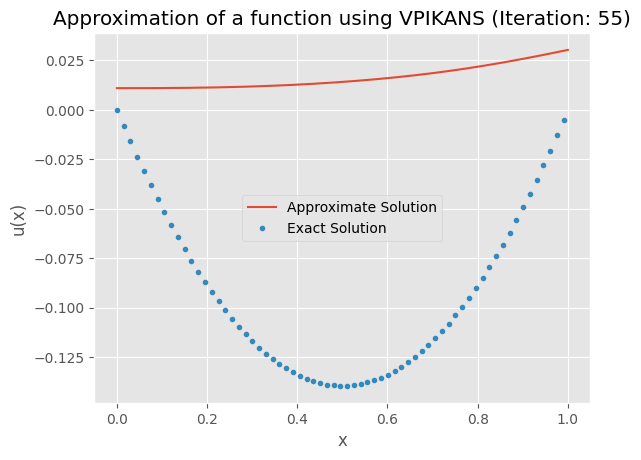

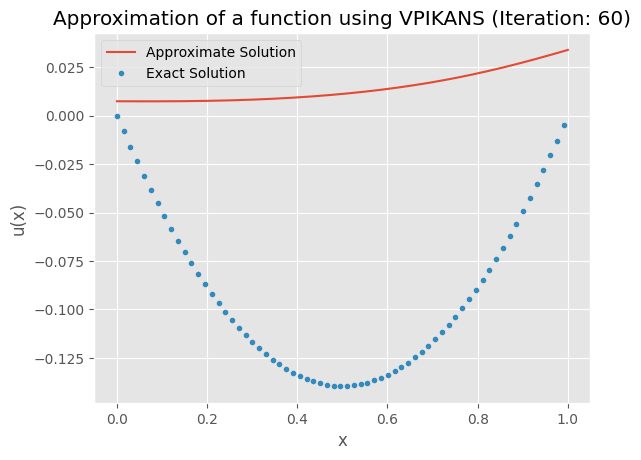

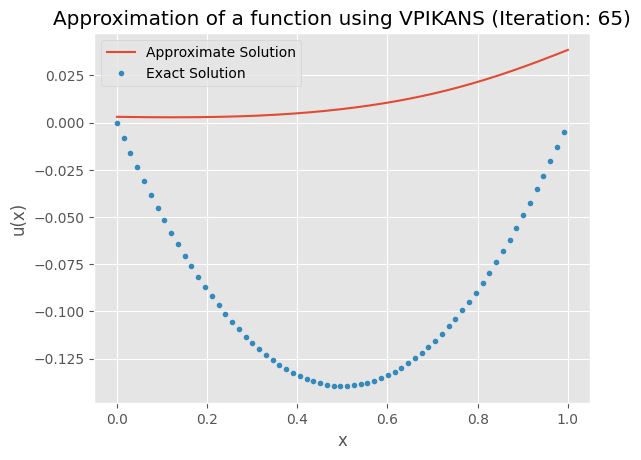

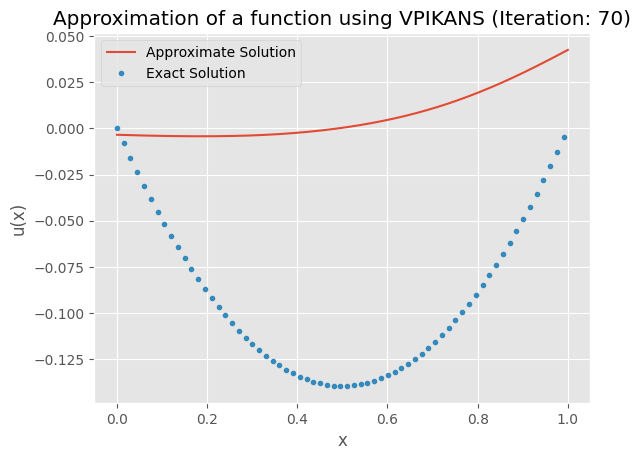

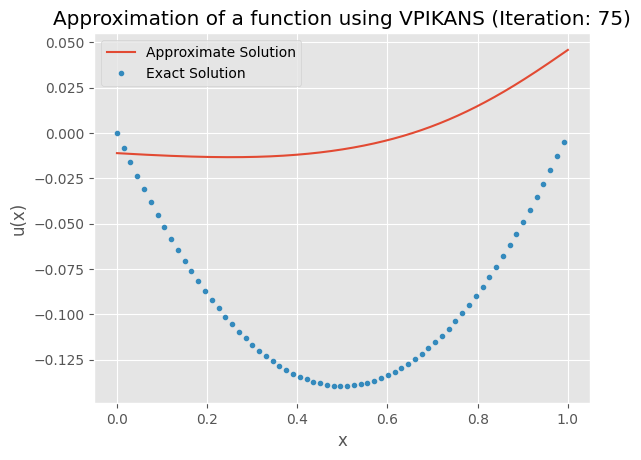

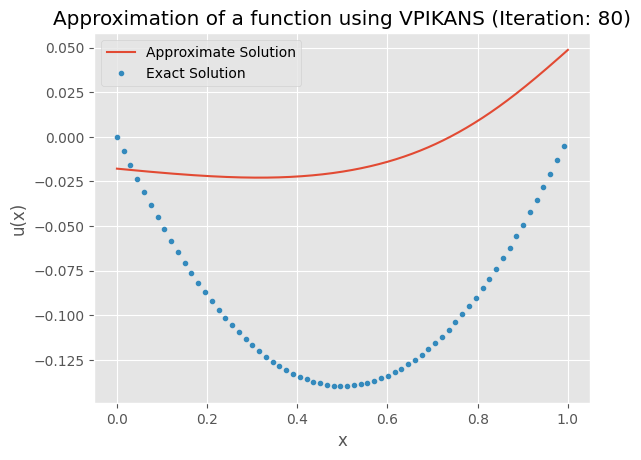

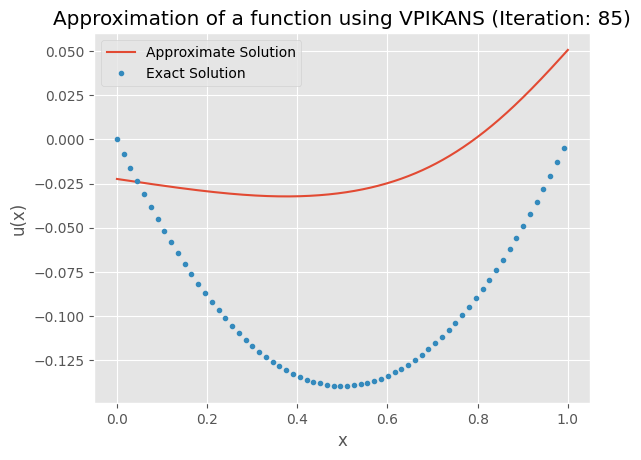

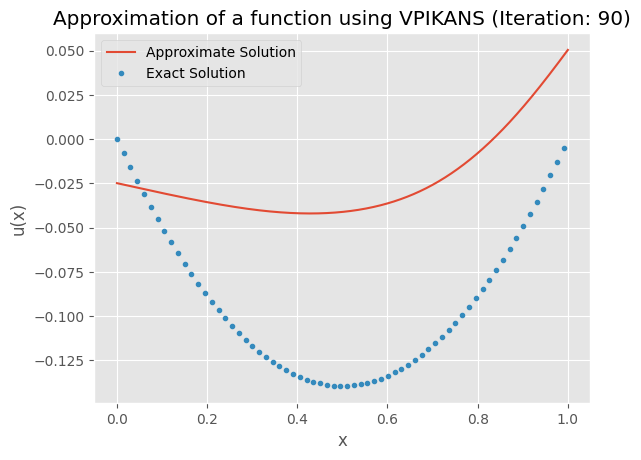

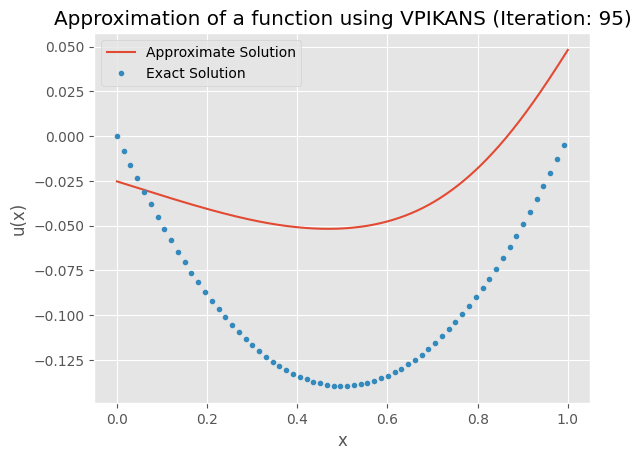

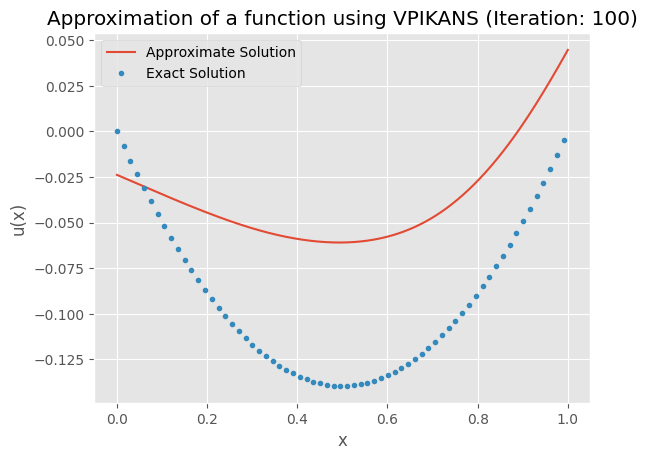

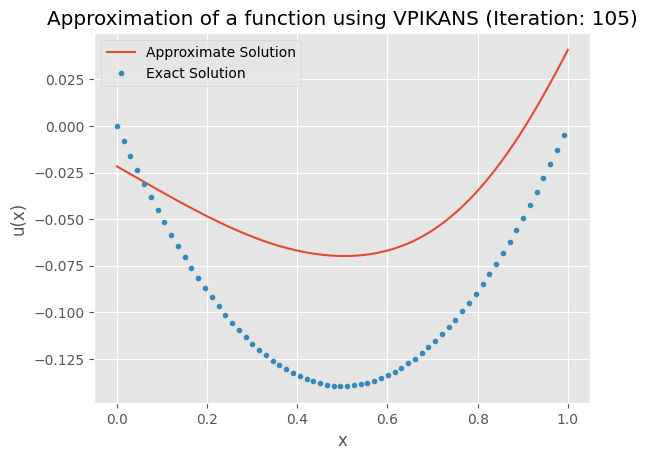

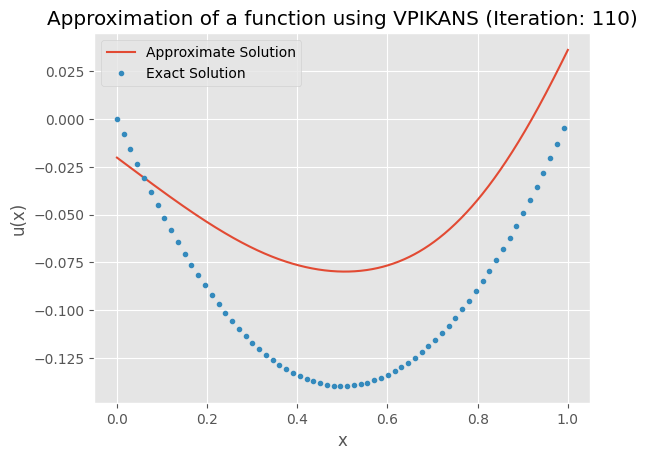

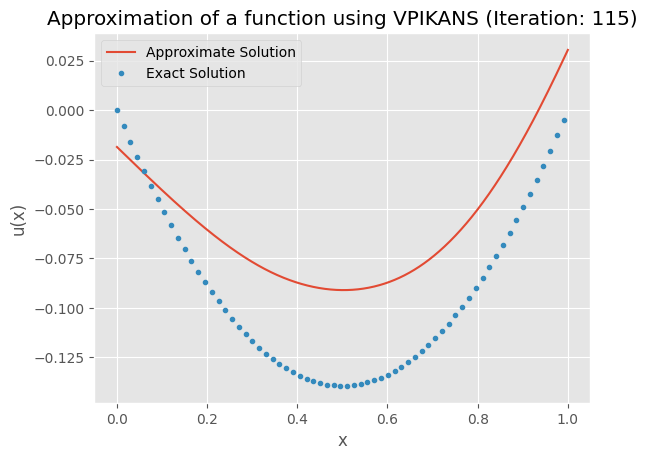

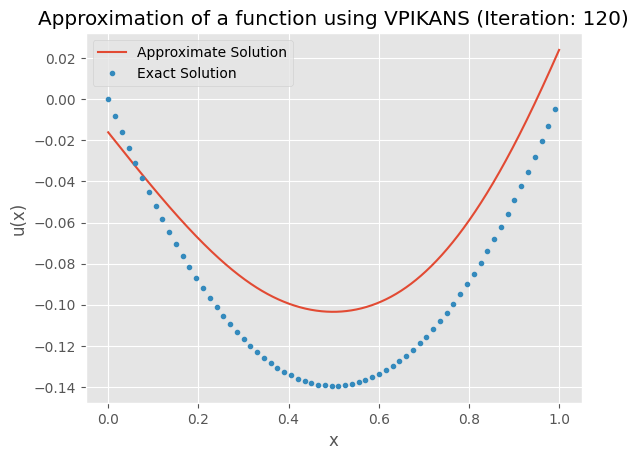

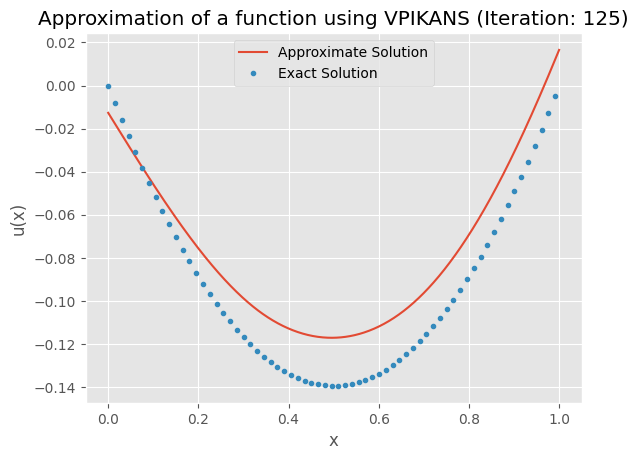

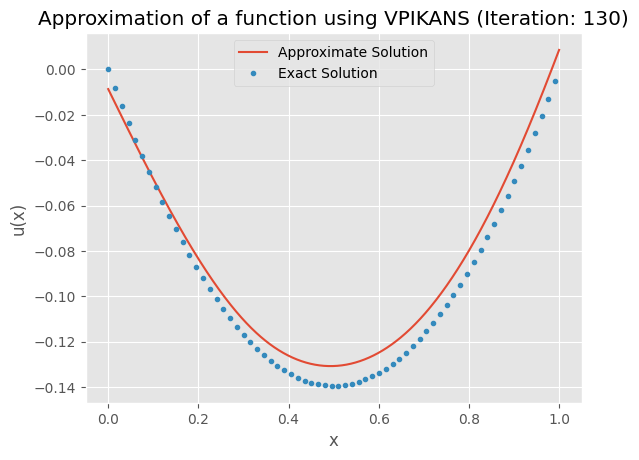

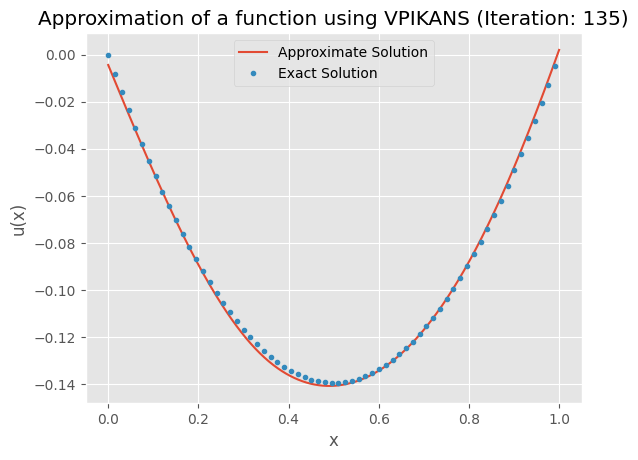

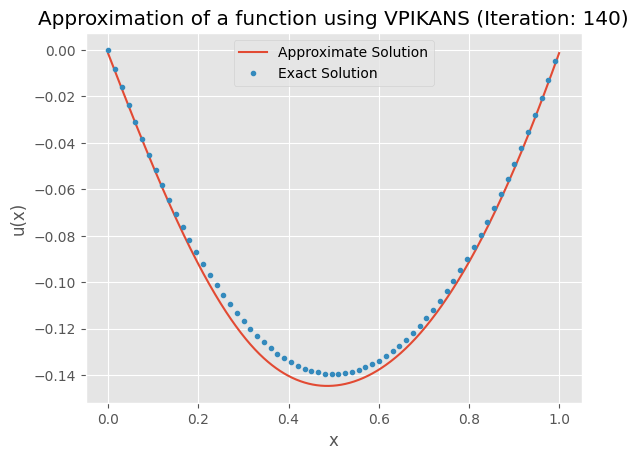

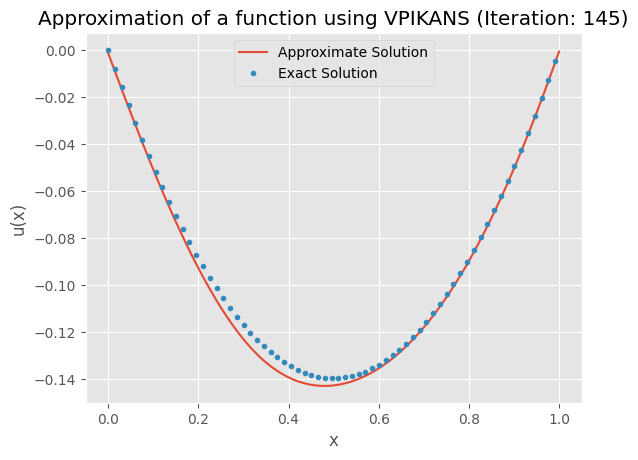

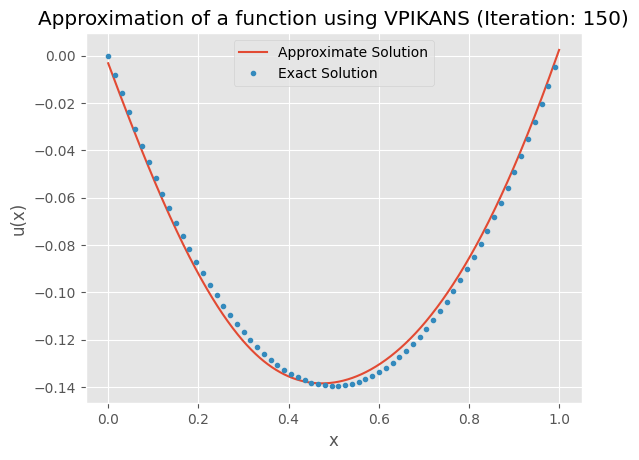

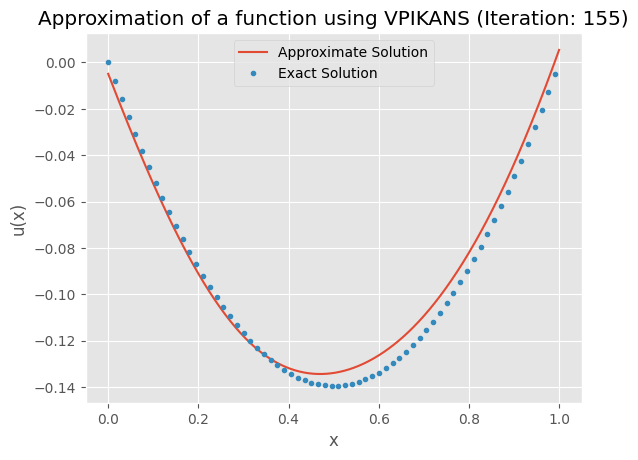

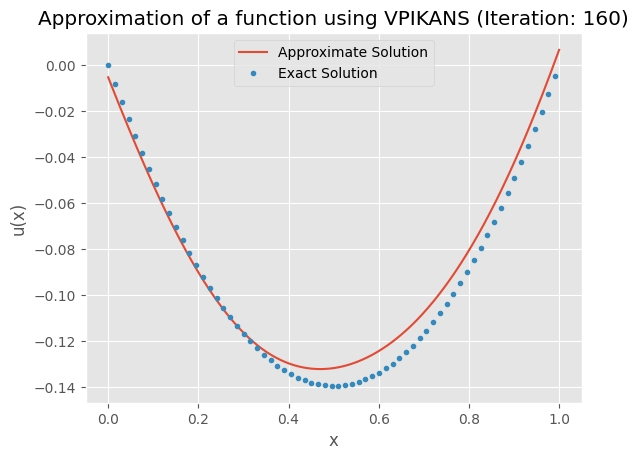

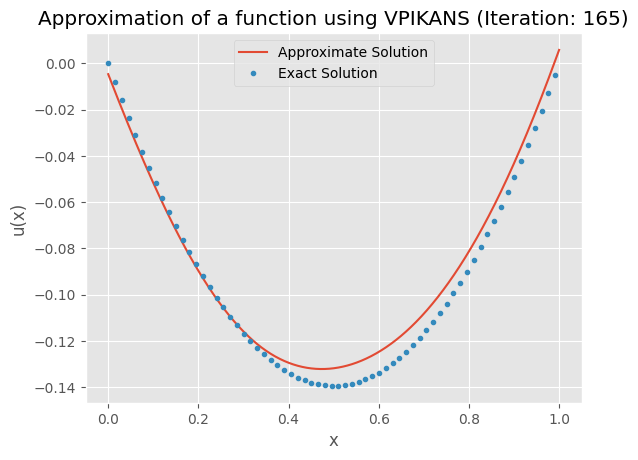

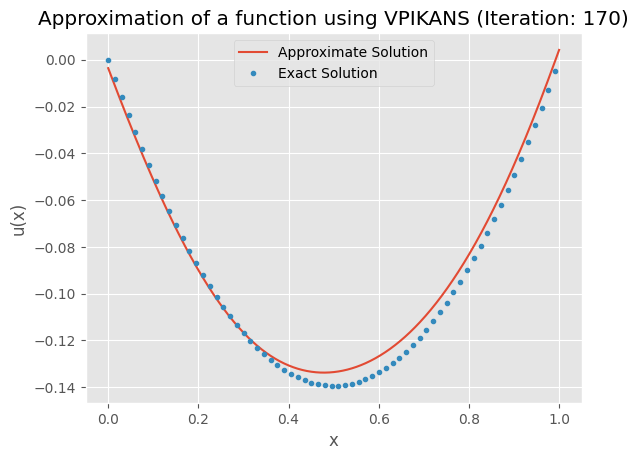

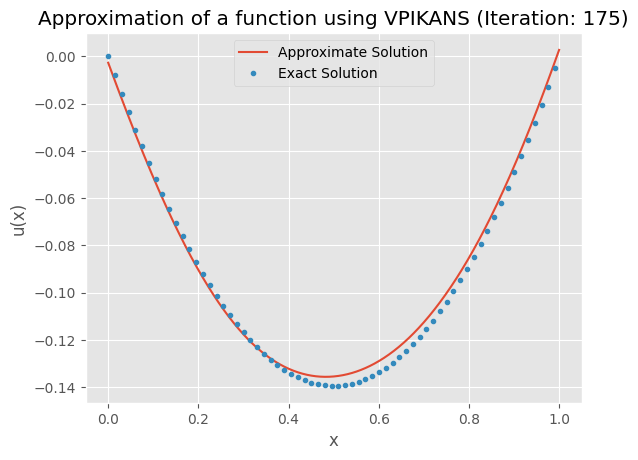

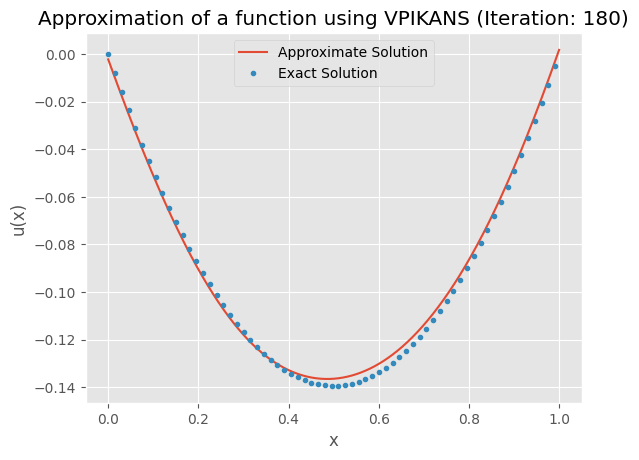

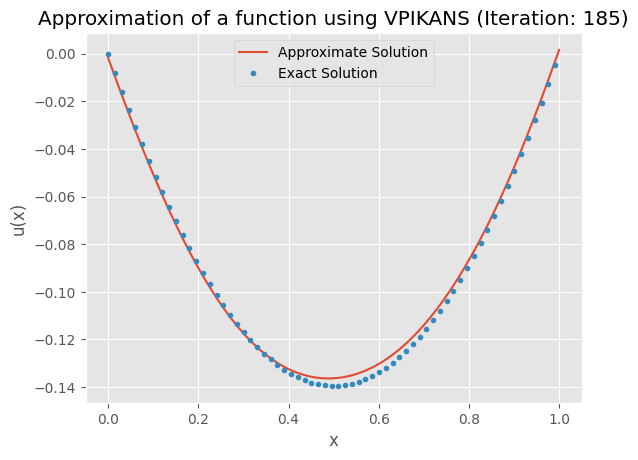

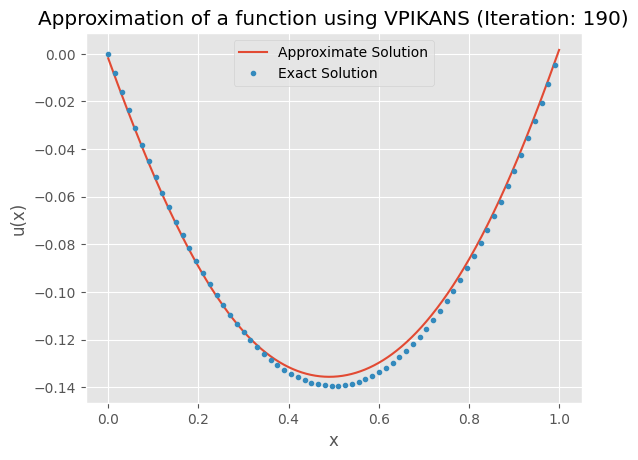

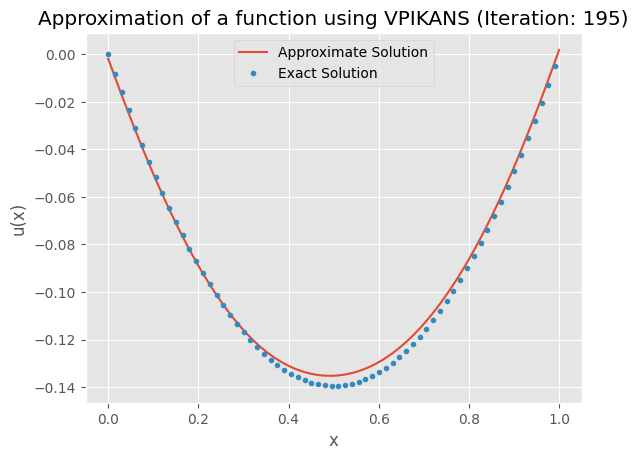

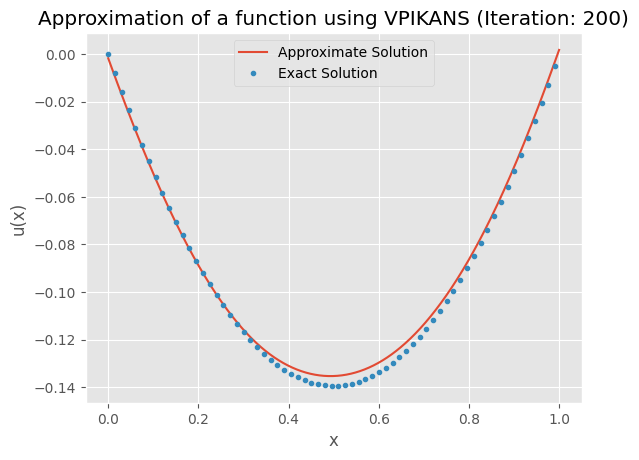

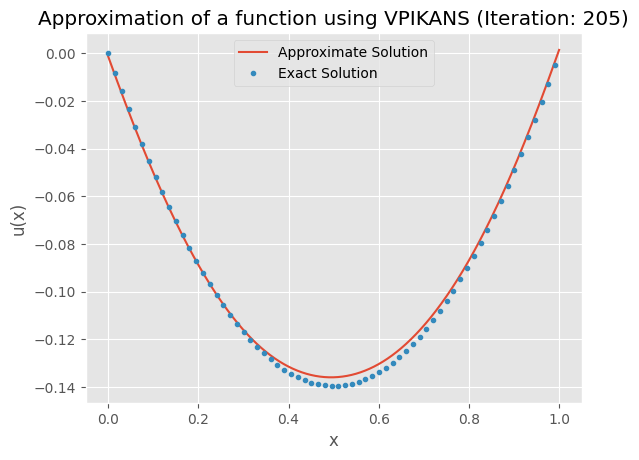

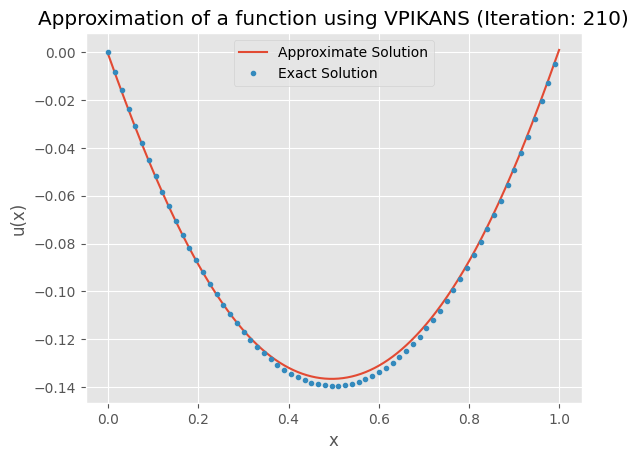

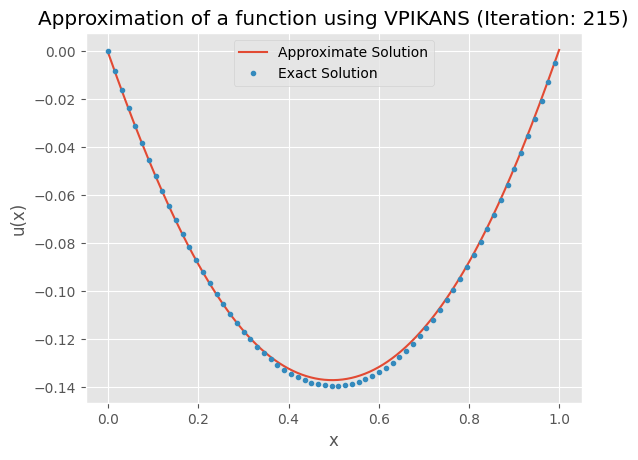

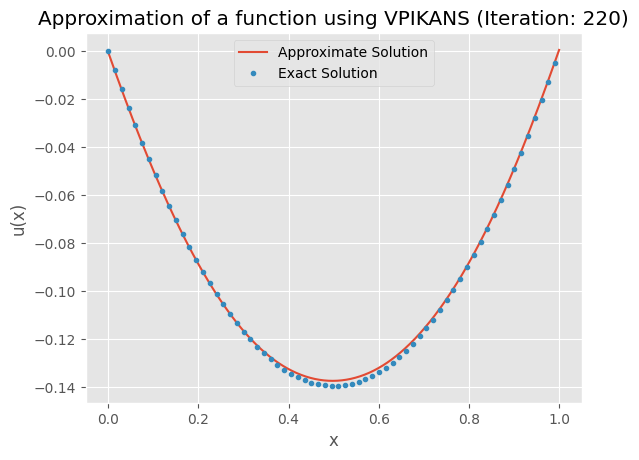

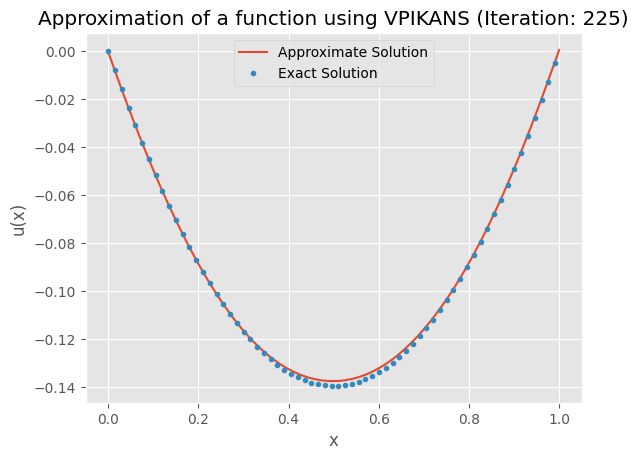

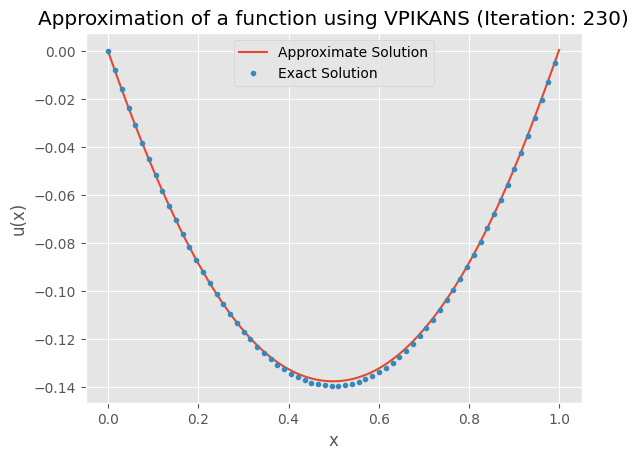

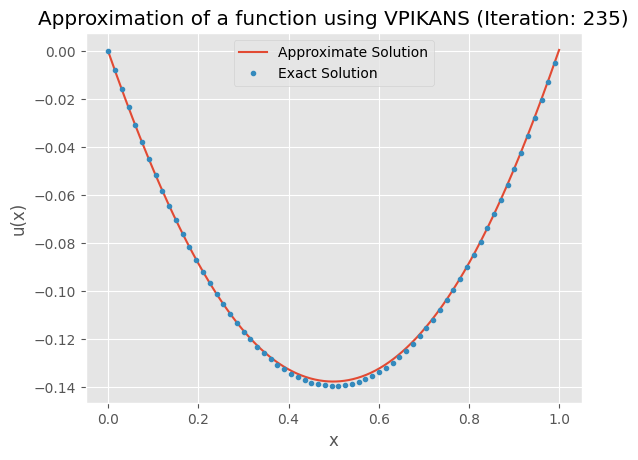

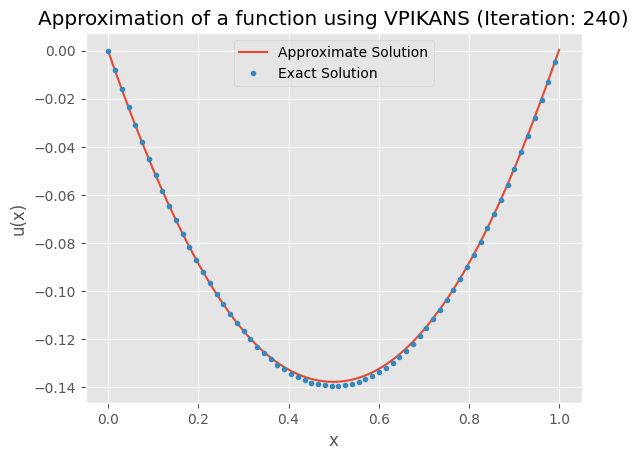

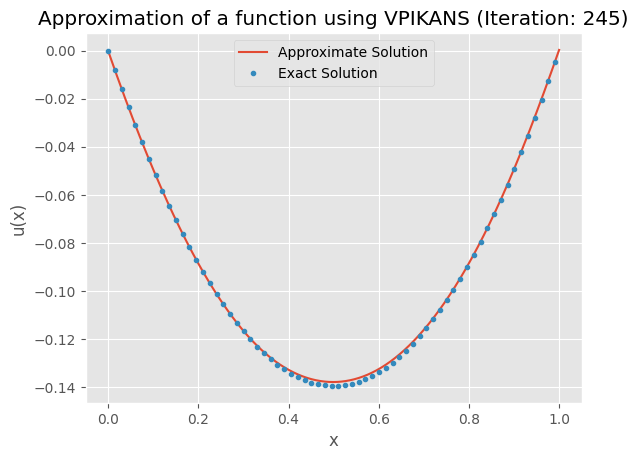

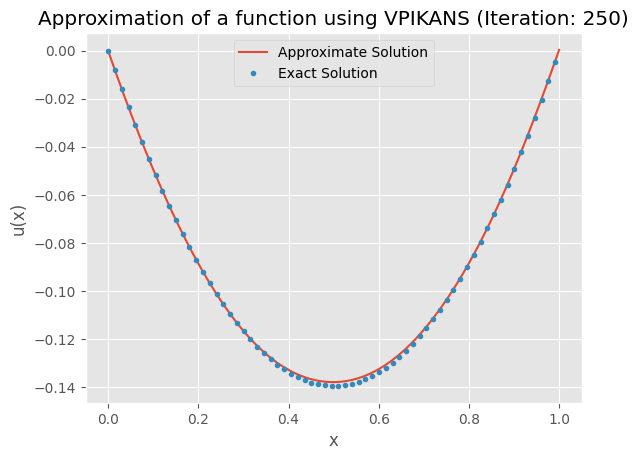

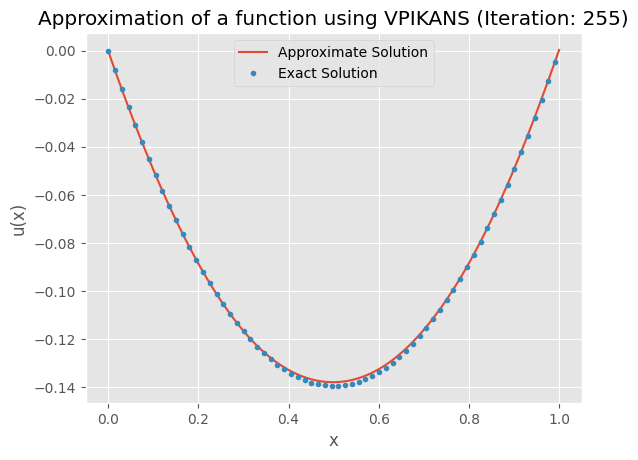

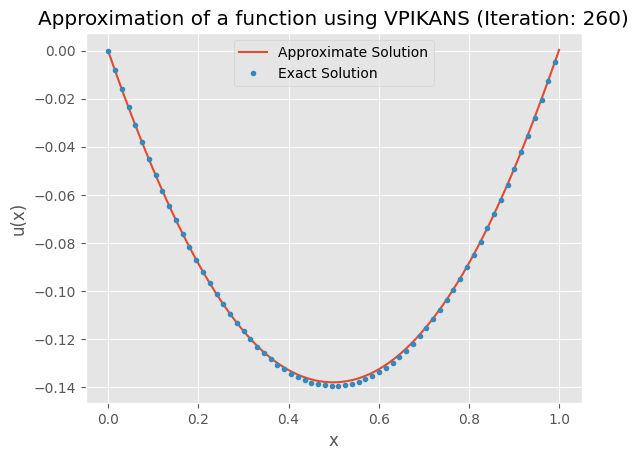

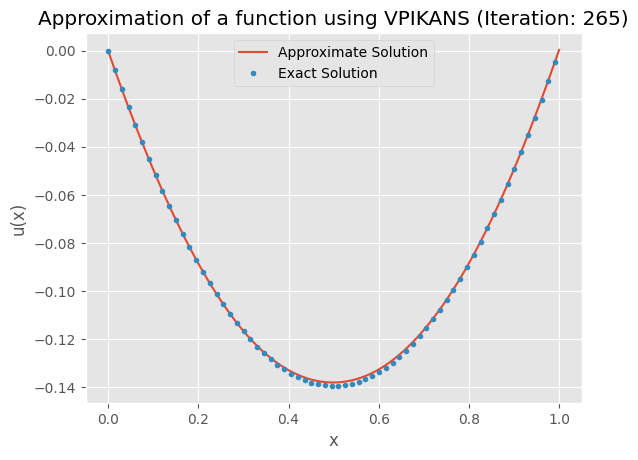

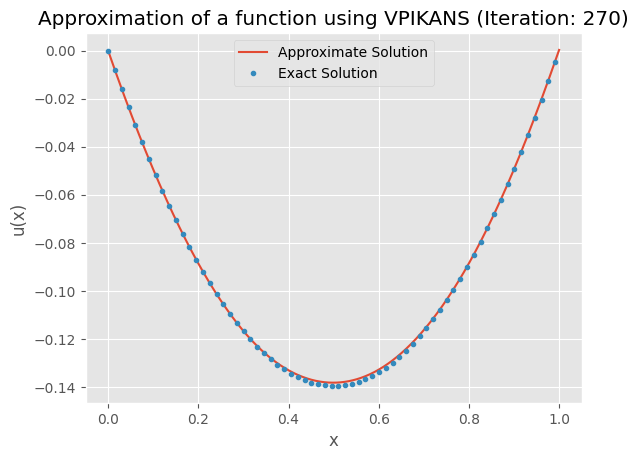

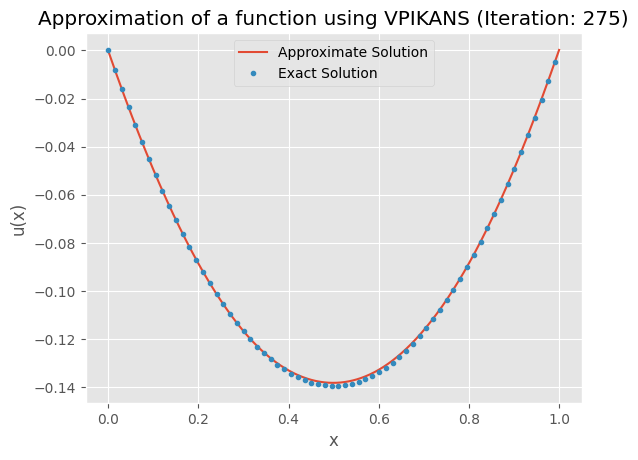

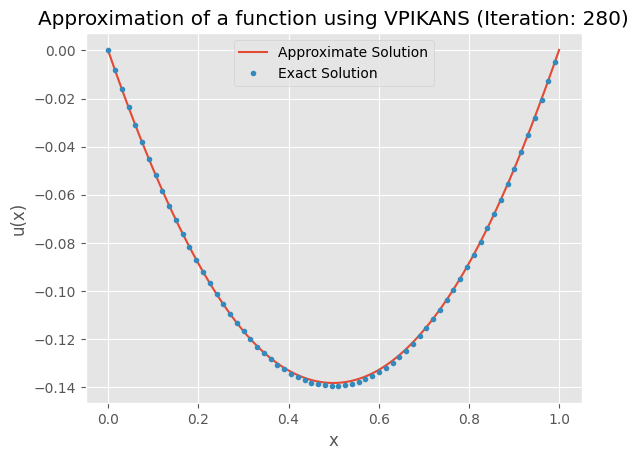

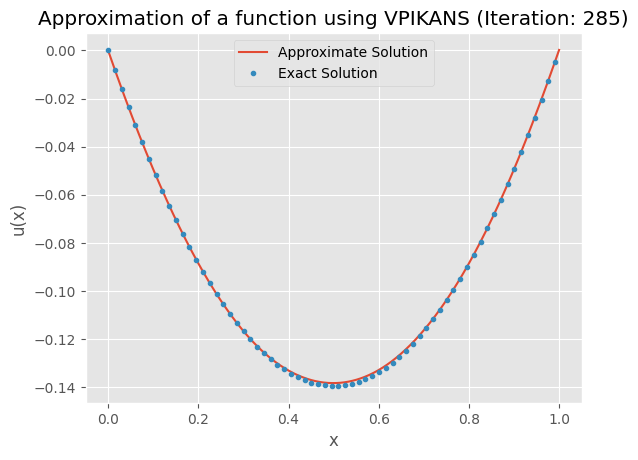

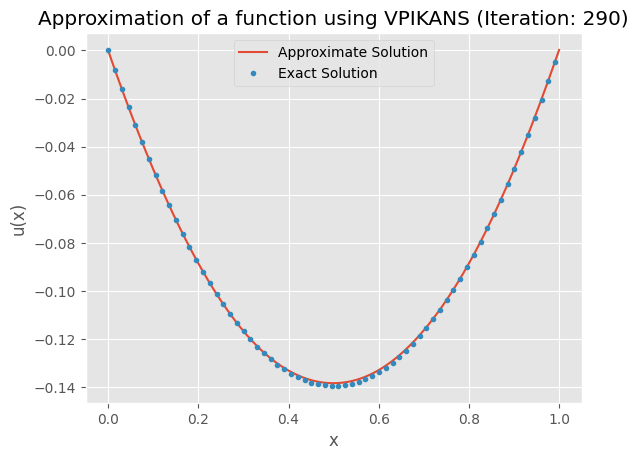

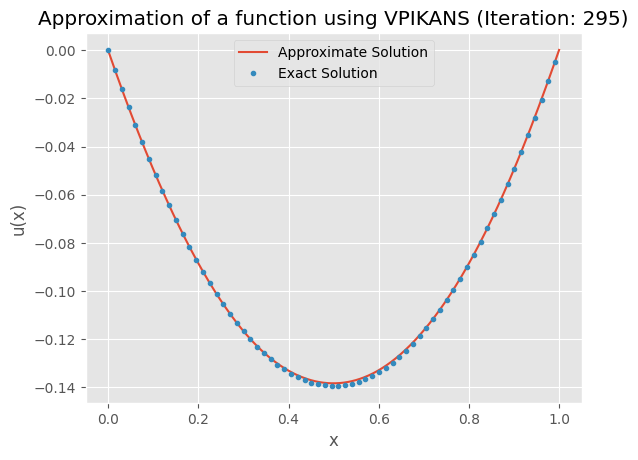

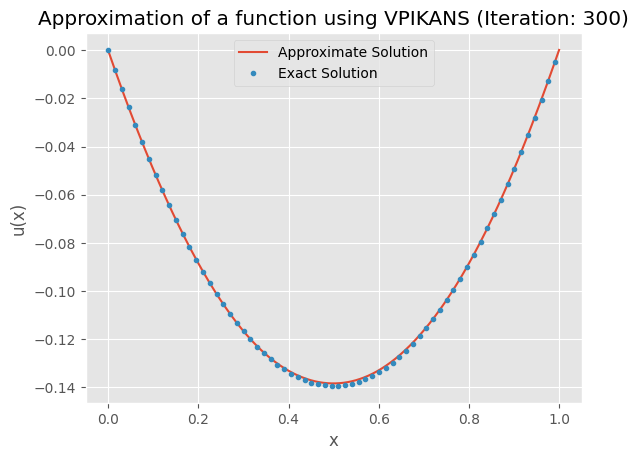

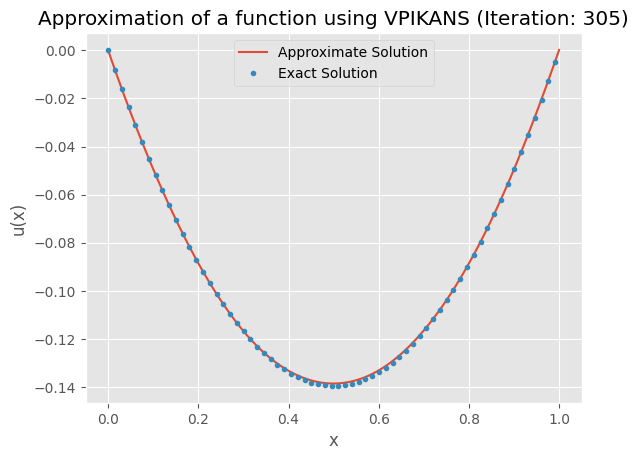

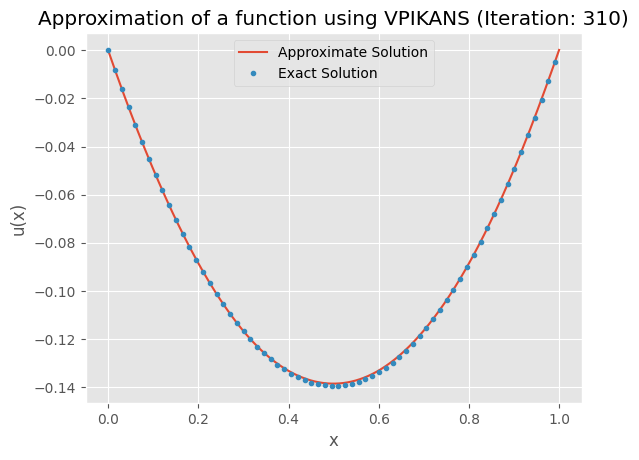

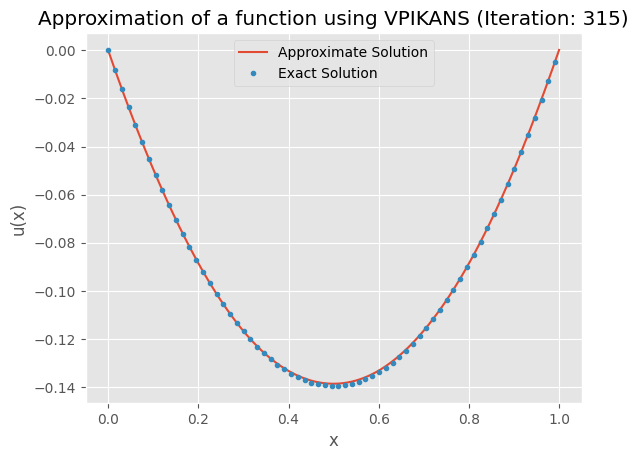

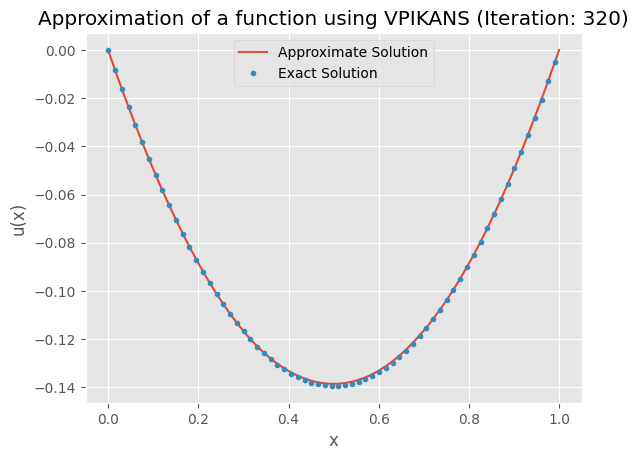

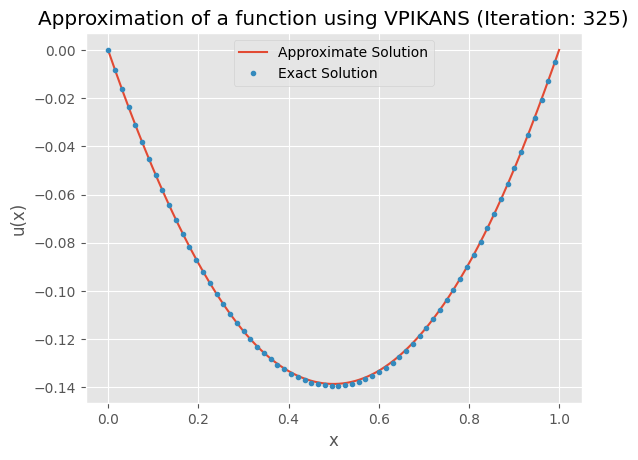

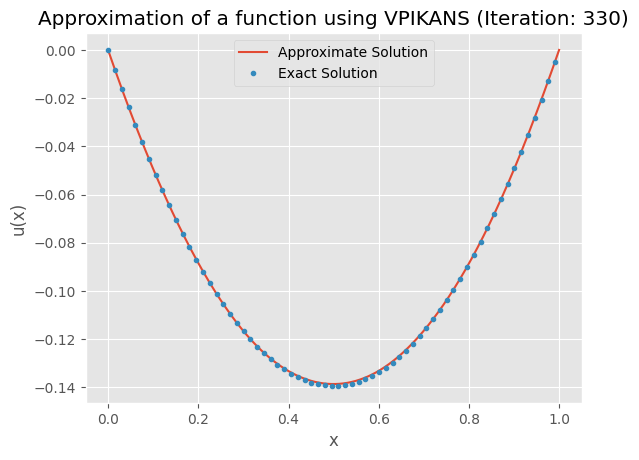

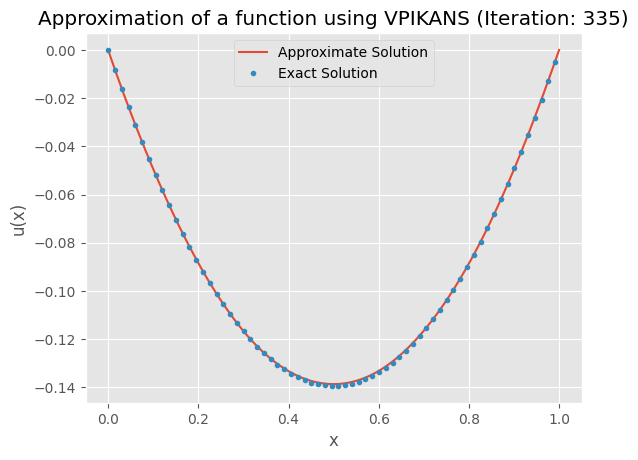

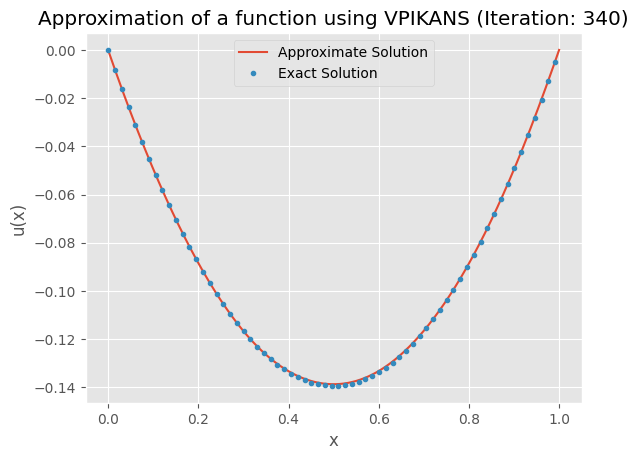

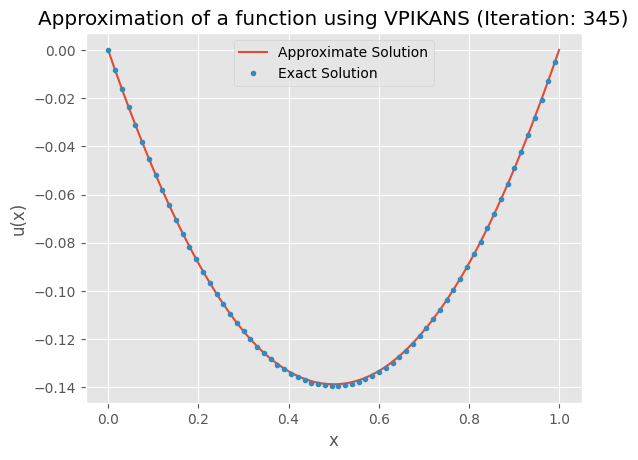

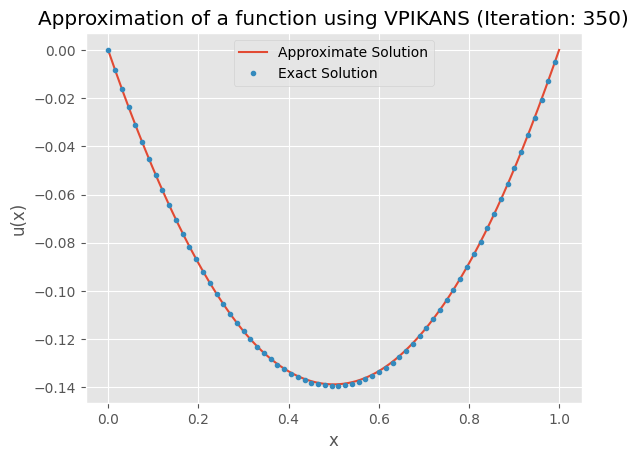

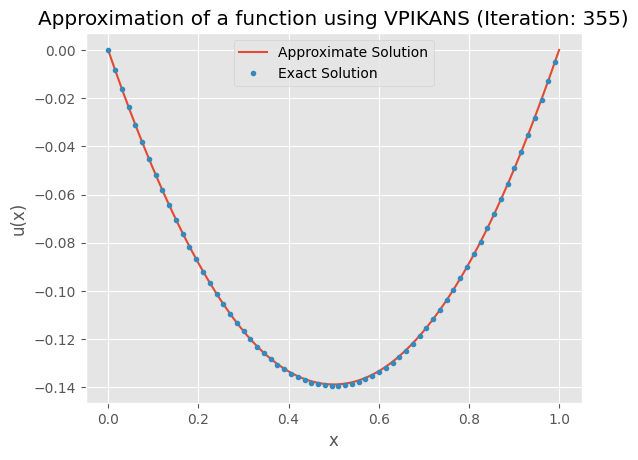

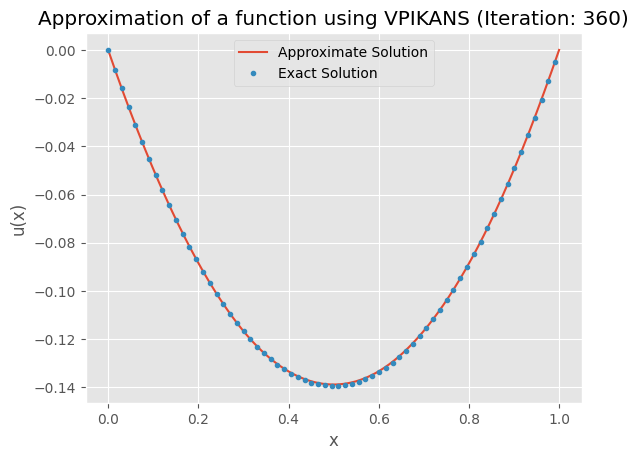

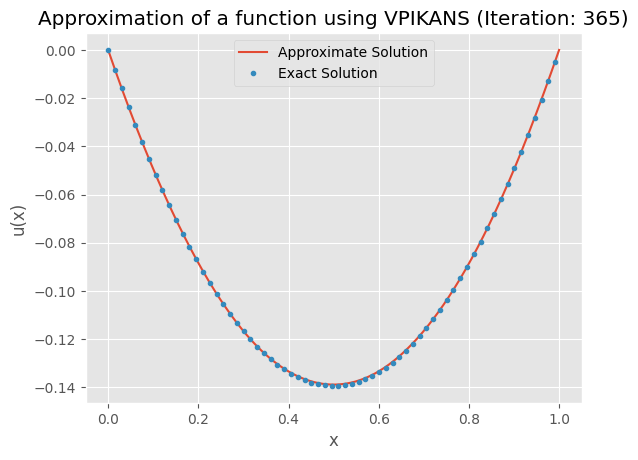

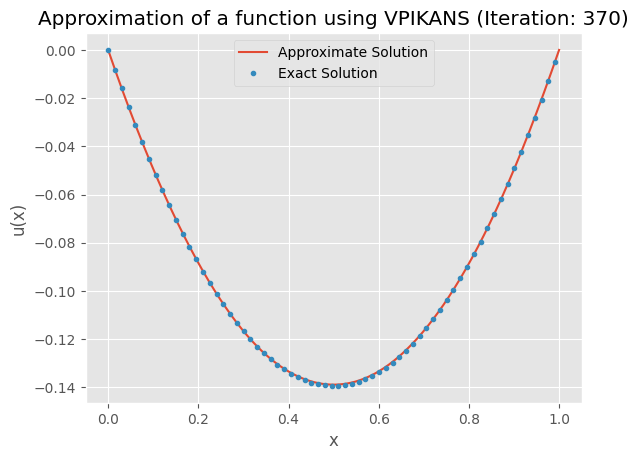

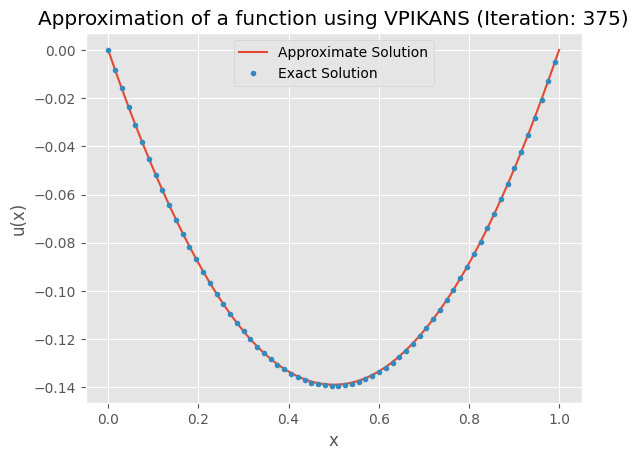

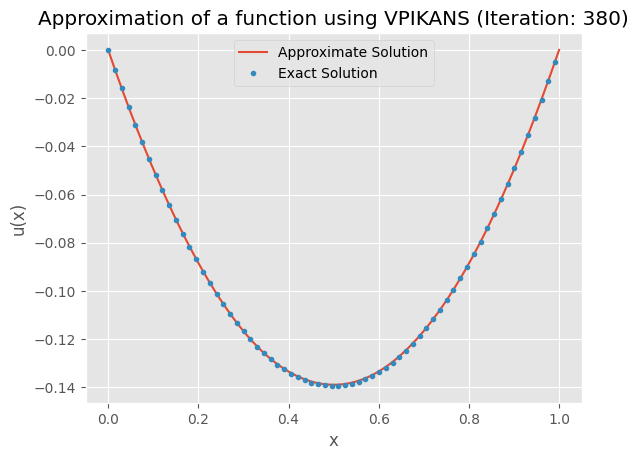

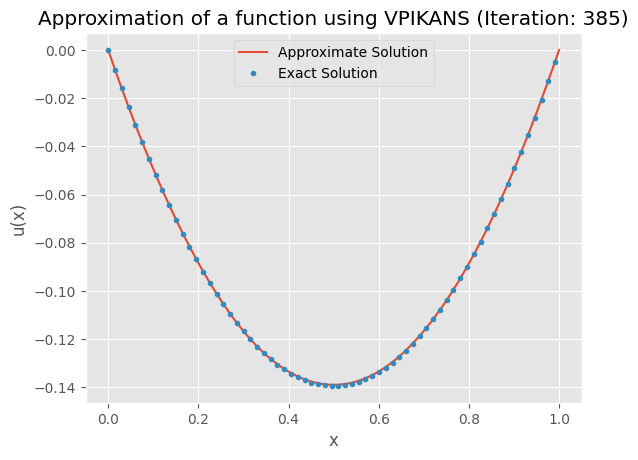

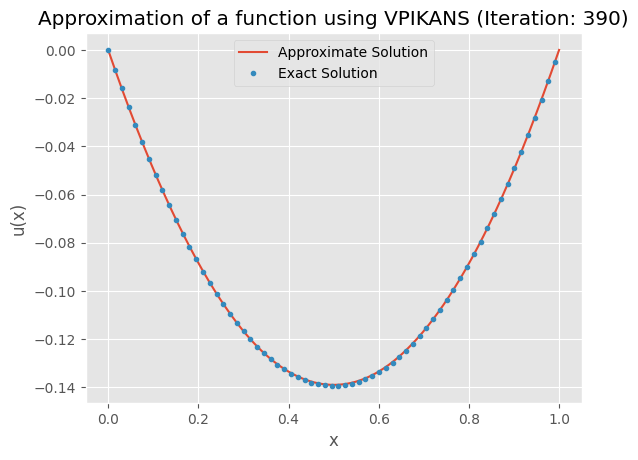

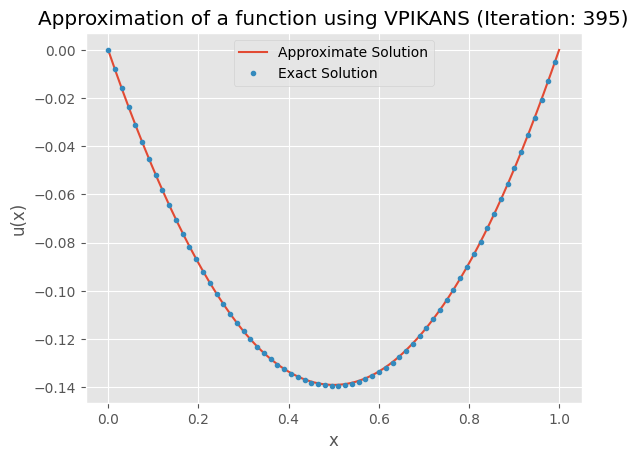

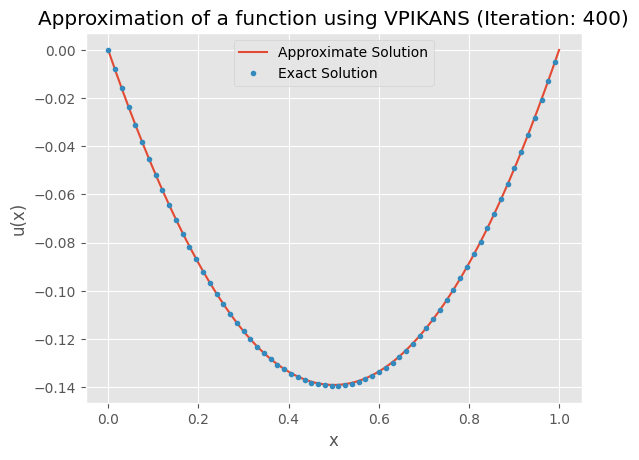

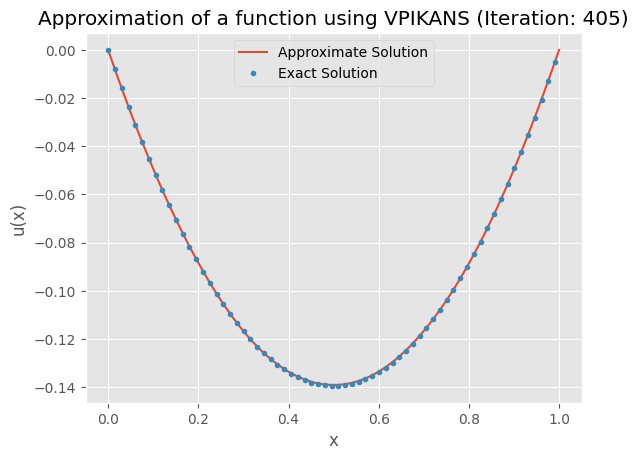

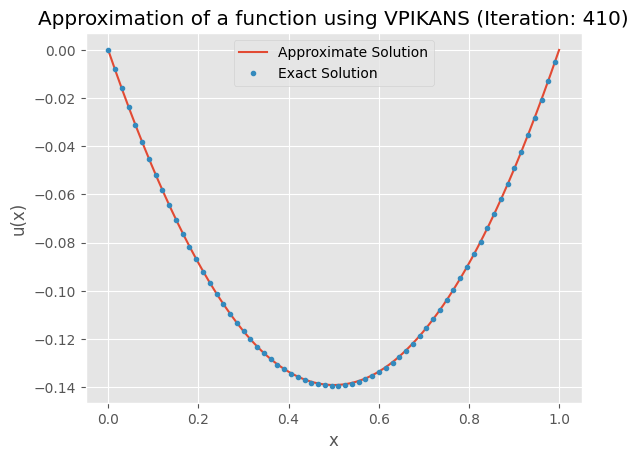

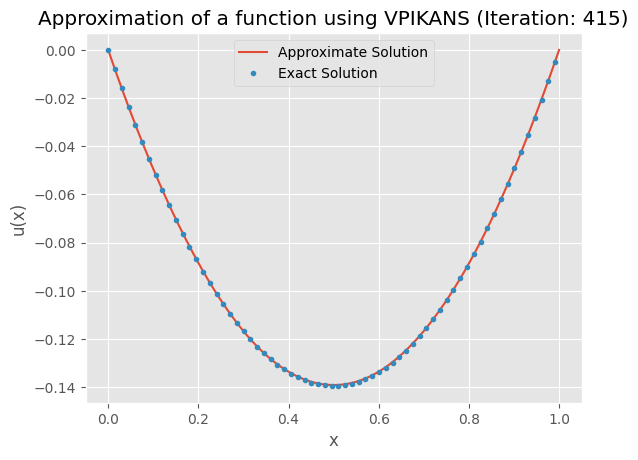

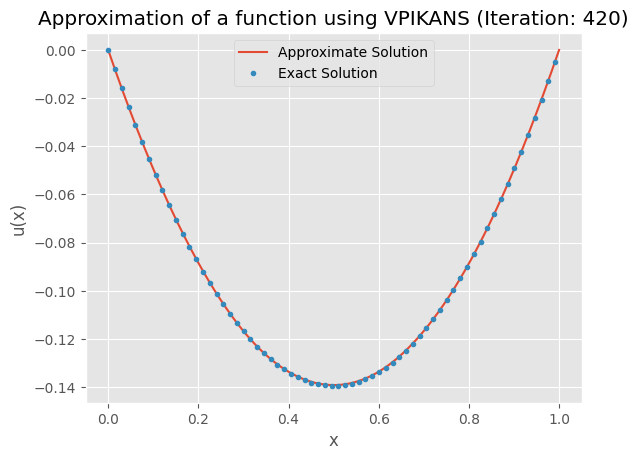

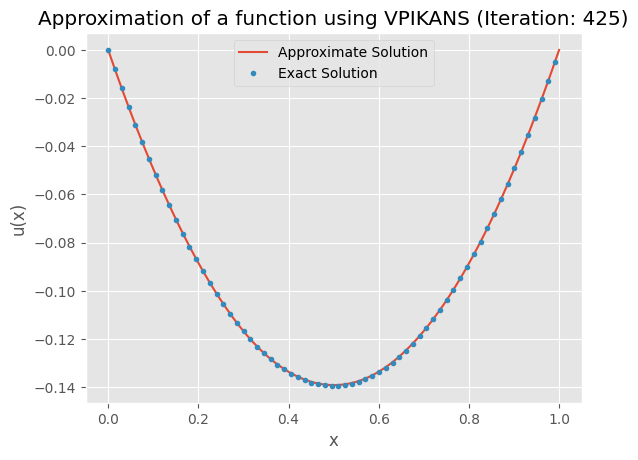

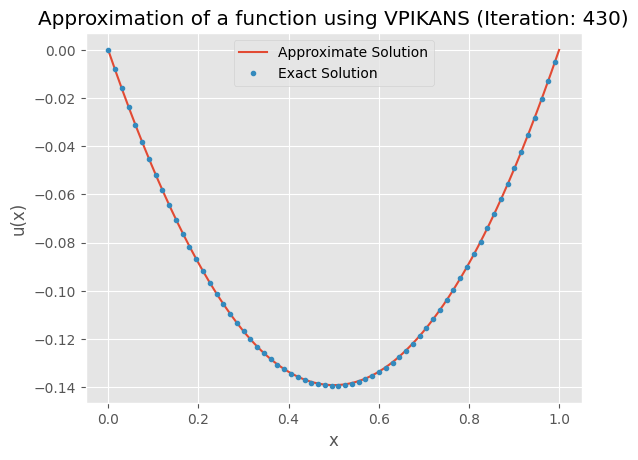

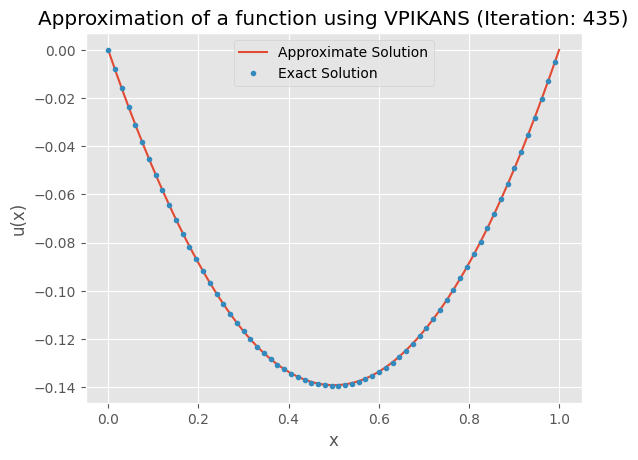

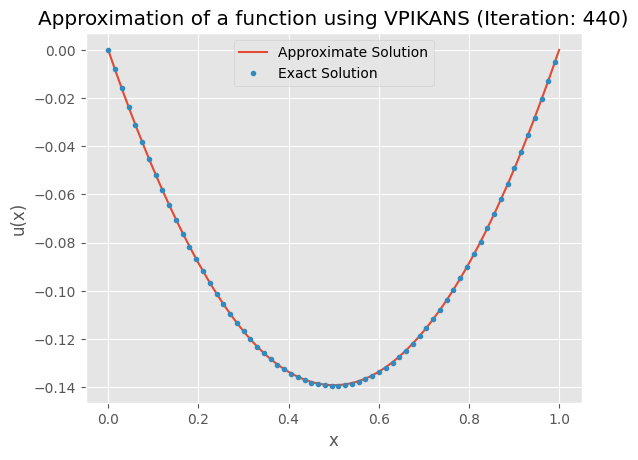

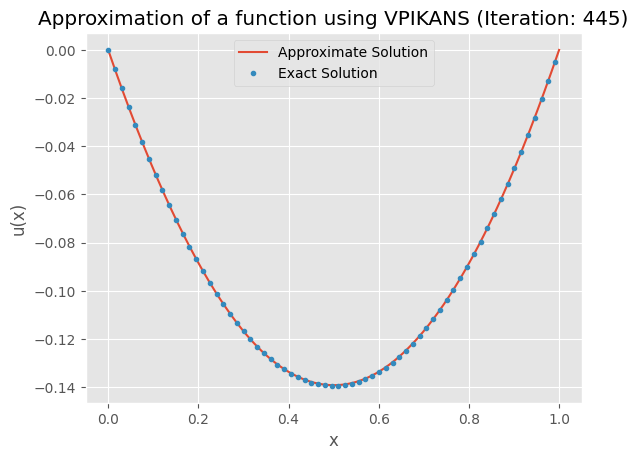

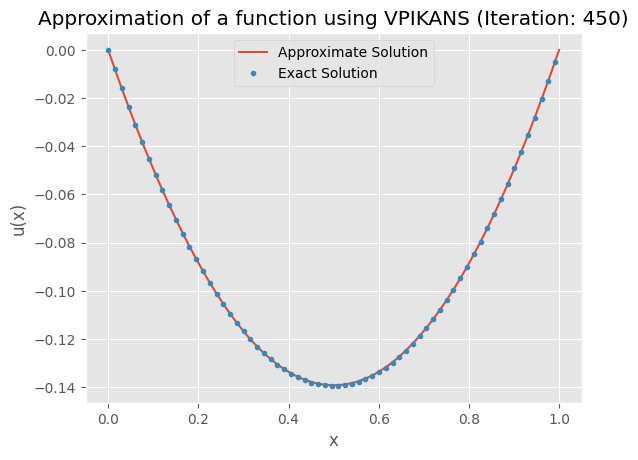

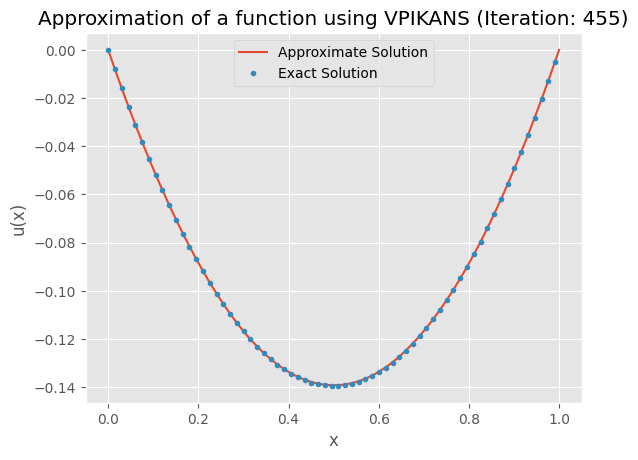

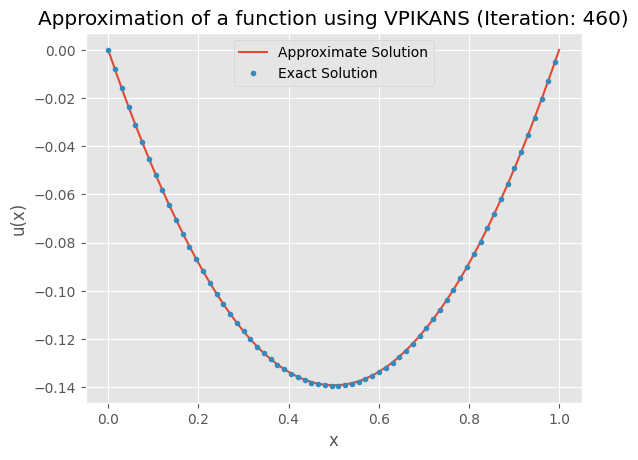

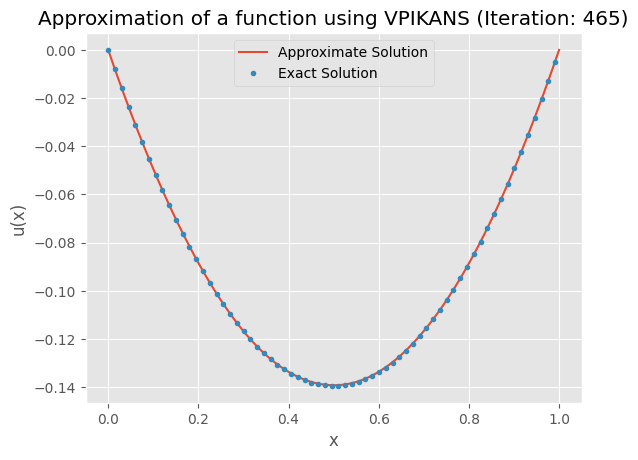

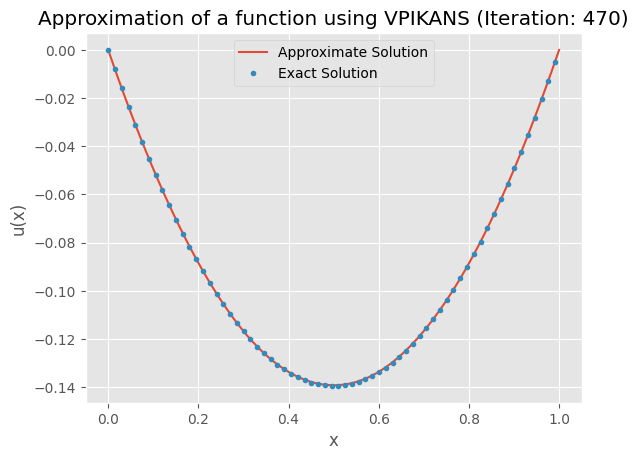

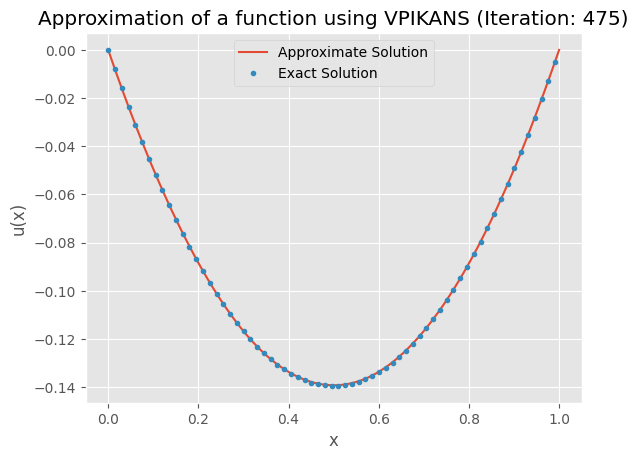

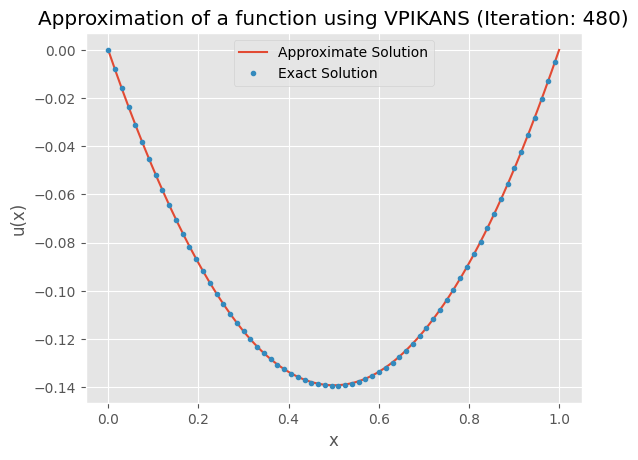

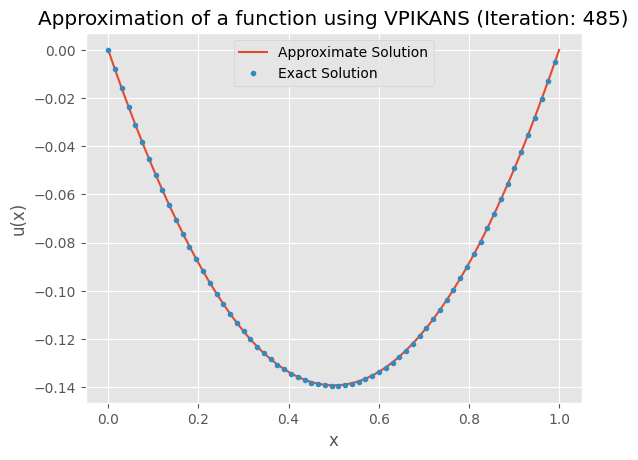

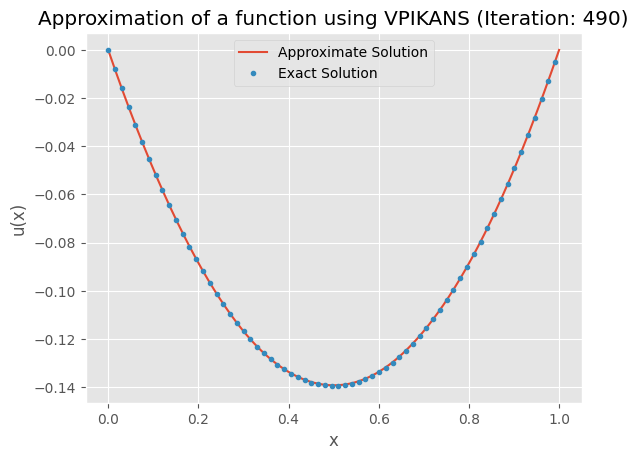

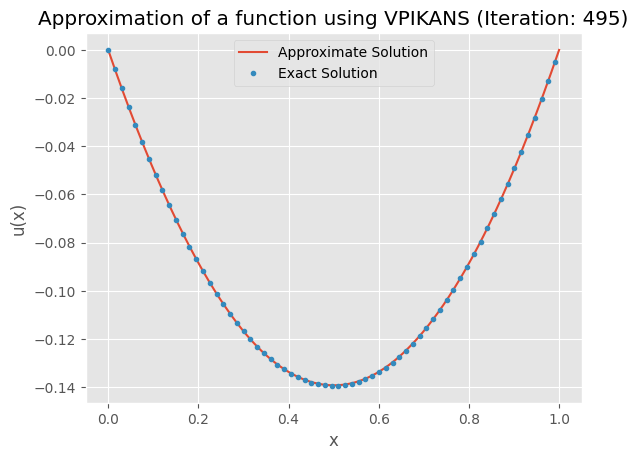

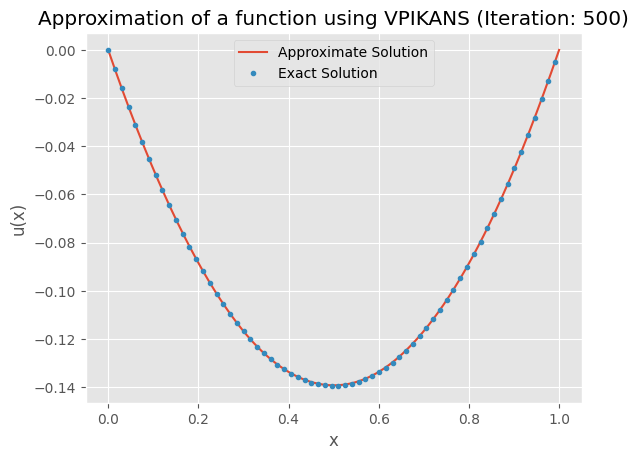

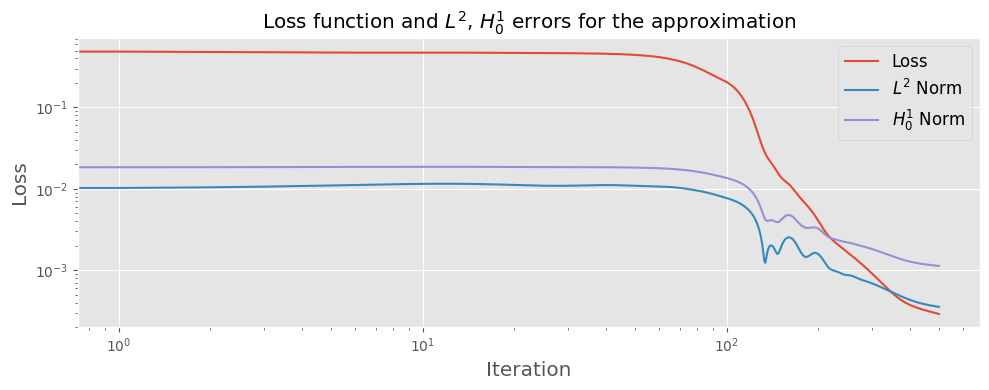

In [13]:
def compute_integral(y, x):    
    integral = torch.trapz(y, x, dim=0)
    return integral

def exact_u_prime(x):
    #return 2*x - torch.pi
    return -(torch.sin(torch.tensor(0.5))/torch.cos(torch.tensor(0.5))) * torch.cos(x) + torch.sin(x) 


def compute_loss(model, x, v, v_dv):
    u = model(x)
    du = torch.autograd.grad(u, x, torch.ones_like(u), create_graph=True, retain_graph=True)[0]     
    
    dvs = v_dv
        
    f_rhs_val = f_rhs(x)    
    #integral_left = compute_integral(torch.einsum('jl,kjl->jk', du, dvs),x)    BUENO SINS FUNCS
    integral_left1 = compute_integral(torch.einsum('ij,ij->ij', du, dvs), x) # PRUEBA HELMHOLTZ
    integral_left2 =  compute_integral(torch.einsum('ij,ij->ij', u, v), x) # PRUEBA HELMHOLTZ
    integral_left = - integral_left1 + integral_left2
    integral_right = compute_integral(torch.einsum('jl,jk->jk', f_rhs_val, v), x)

    error_PDE = (integral_left - integral_right)**2    
    # Boundary condition loss
    bc_loss = (model(torch.tensor([[0.0]], device=x.device))**2 + 
               model(torch.tensor([[1.0]], device=x.device))**2)
    
    # Combine PDE loss and boundary condition loss
    loss = error_PDE.sum() + 10 * bc_loss.sum()

    return loss

def compute_errors(model, x, exact_u, N):
    exact_function = exact_u(x)
    predicted_function = model(x)

    error_between_functions = exact_function - predicted_function
    error_squared = error_between_functions**2
    L2_error_aux = compute_integral(error_squared, x)
    L2_error = 1/(N) * L2_error_aux**0.5

    predicted_derivative = torch.autograd.grad(predicted_function, x, torch.ones_like(predicted_function), create_graph=True, retain_graph=True)[0]
    exact_derivative = exact_u_prime(x)
    error_between_derivatives = exact_derivative - predicted_derivative
    error_derivative_squared = error_between_derivatives**2

    H1_error = 1/(N)* (compute_integral(error_squared + error_derivative_squared, x))**0.5
    
    #exact_function_squared = exact_function**2
    #exact_function_norm = compute_integral(exact_function_squared, x)
    

    #relative_H1_error = H1_error / exact_function_norm

    return torch.sqrt(L2_error).item(), torch.sqrt(H1_error).item() #torch.sqrt(relative_H1_error).item()

def main():
    N_modes = 20
    n_pts = 1000
    iterations = 500

    torch.manual_seed(123)
    #model = FCN(1, 1, 10, 4)
    #device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    device = 'cpu'
    model = KAN(width=[1,3,3,3,1], grid=3, k=3, seed=42, device=device)
    model.to(device)  # Move the model to the selected device
    optimizer = optim.Adam(model.parameters(), lr=1e-3)
    losses = []
    L2_errors = []    
    h1_norms = []      

    n = torch.linspace(1, N_modes, N_modes)     
    len = 0

    for i in range(iterations):        
        x = torch.linspace(0, 1, n_pts)        
        
        # Funciones de test - vectores propios Helmholtz        
        v_test = torch.zeros(n_pts, N_modes)
        v_dv = torch.zeros(n_pts, N_modes)
        for j in range(vecs_comp.shape[1]):
            spline_mode = UnivariateSpline(x, vecs_comp[:, j], s=0, k=3)
            v_mode = spline_mode(x)  
            v_mode = v_mode.reshape(n_pts, 1)              
            v_test[:, j] = torch.tensor(v_mode).squeeze()
            v_dv[:, j] = torch.tensor(spline_mode.derivative()(x)).squeeze()            

        x = x.requires_grad_(True).view(n_pts, 1)              
        
        v = v_test
        dvs = v_dv
    
        optimizer.zero_grad()

        loss = compute_loss(model, x, v, dvs)        
        loss.backward(retain_graph=True)
        optimizer.step()                   

        losses.append(loss.item())
        L2_error, H1_norm = compute_errors(model, x, exact_u,n_pts)
        L2_errors.append(L2_error)
        h1_norms.append(H1_norm)
        if (i+1) % 5 == 0:
            len += 1
            print(f"Loss at iteration {i+1}: {loss.item():.15f}")  
               
            x_test = torch.linspace(0, 1, n_pts).view(n_pts, 1)
            y_test = model(x_test).detach().numpy()    
            y_real = exact_u(x_test).detach().numpy() 
            with plt.style.context(style):        

                fig, ax = plt.subplots()
                plt.plot(x_test, y_test)
                plt.plot(x_test, y_real, ".", markevery=15)
                plt.title('Approximation of a function using VPIKANS (Iteration: ' +str(i+1) +')')
                plt.legend(['Approximation', 'Exact'])
                plt.xlabel("x")
                plt.ylabel("u(x)")
                ax.legend(['Approximate Solution', 'Exact Solution'])
                name = 'a'*(len)
                plt.savefig("figures_Vpikan/iter"+name+".png", dpi=300, bbox_inches='tight')
                #plt.show()


            #style_plot(x_test, y_real, x_data=None, y_data=None, yh=y_test, i=i)   

    with plt.style.context(style):        
        fig, ax = plt.subplots(figsize=(10, 4))

        # Graficar la función de pérdida en escala semilog
        ax.loglog(losses, label="Loss")

        # Graficar el error L2 en escala semilog en la misma gráfica
        ax.loglog(L2_errors, label="$L^2$ Norm")       

        ax.loglog(h1_norms, label="$H_0^1$ Norm")         

        ax.set_title("Loss function and $L^2$, $H_0^1$ errors for the approximation", fontsize="x-large")
        ax.set_ylabel("Loss", fontsize="x-large")  # Etiqueta del eje y

        # Configurar los títulos y etiquetas    
        ax.set_xlabel("Iteration", fontsize="x-large")  # Cambiar a "x-large"        
        ax.legend(fontsize="large")

        # Ajustar el layout y mostrar la figura
        plt.tight_layout()
        plt.savefig('combined_semilog_plot.pdf', dpi=300, bbox_inches='tight')
        plt.show()
    
    x_test = torch.linspace(0, 1, n_pts).view(n_pts, 1)
    y_test = model(x_test).detach().numpy()    
    y_real = exact_u(x_test).detach().numpy()      
if __name__ == "__main__":
    main()

In [7]:
import os
from PIL import Image

# Directorio donde están las imágenes
image_folder = 'figures_Vpikan'
# Nombre del archivo de salida
gif_name = 'figures_Vpikan/vpikan_animation.gif'

# Obtener la lista de archivos de imagen en la carpeta
images = [img for img in os.listdir(image_folder) if img.endswith(".png")]
images.sort()  # Asegurarse de que están en orden alfabético

# Cargar la primera imagen para obtener su tamaño
first_image = Image.open(os.path.join(image_folder, images[0]))
first_size = first_image.size  # Obtener el tamaño de la primera imagen (ancho, alto)

# Crear lista para almacenar las imágenes redimensionadas y convertirlas al mismo modo (RGB)
frames = []
for image in images:
    img = Image.open(os.path.join(image_folder, image))
    img = img.convert("RGB")  # Convertir la imagen al modo RGB
    img = img.resize(first_size)  # Redimensionar la imagen al tamaño de la primera imagen
    frames.append(img)

# Calcular la duración por fotograma para que el GIF dure 10 segundos
total_duration = 10 * 1000  # 10 segundos en milisegundos
duration_per_frame = total_duration // len(frames)

# Guardar el gif
frames[0].save(gif_name, format='GIF', append_images=frames[1:], save_all=True, duration=duration_per_frame, loop=0)

print(f"GIF creado: {gif_name}, con duración de {duration_per_frame} ms por fotograma")


GIF creado: figures_Vpikan/vpikan_animation.gif, con duración de 100 ms por fotograma
